In [94]:
# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect
import pandas as pd

In [158]:

from functions_Black_Scholes import *

from functions_Monte_Carlo import *


## 1: Black-Scholes Pricing and Greeks 

In [8]:
#import functions_Black_Scholes 

In [9]:
functions_list = inspect.getmembers(functions_Black_Scholes, inspect.isfunction)
for name, _ in functions_list:
    print(name)

Black_Scholes_Call
Black_Scholes_Call_Rho
Black_Scholes_Call_Theta
Black_Scholes_Gamma
Black_Scholes_Put
Black_Scholes_Put_Delta
Black_Scholes_Put_Rho
Black_Scholes_Put_Theta
Black_Scholes_Vega
Black_Scholes__Call_Delta


In [4]:
## Black-Scholes option's price

In [10]:
S0 = 100 #Current stock price 
K = 100 # Strike price 
sigma = 0.2 #annualized volatility 
t = 1 # time to maturity (in years) 
r = 0.035 # risk-free interest rate 

print("BS Call Price:", Black_Scholes_Call(S0, K, sigma, t, r))
print("BS Put Price:", Black_Scholes_Put(S0, K, sigma, t, r))
print("Call Delta:", Black_Scholes__Call_Delta(S0, K, sigma, t, r))
print("Put Delta:", Black_Scholes_Put_Delta(S0, K, sigma, t, r))
print("Gamma:", Black_Scholes_Gamma(S0, K, sigma, t, r))
print("Vega:", Black_Scholes_Vega(S0, K, sigma, t, r))
print("Call Theta:", Black_Scholes_Call_Theta(S0, K, sigma, t, r))
print("Put Theta:", Black_Scholes_Put_Theta(S0, K, sigma, t, r))
print("Call Rho:", Black_Scholes_Call_Rho(S0, K, sigma, t, r))
print("Put Rho:", Black_Scholes_Put_Rho(S0, K, sigma, t, r))


BS Call Price: 9.667467371387687
BS Put Price: 6.228008997144336
Call Delta: 0.6083418808463948
Put Delta: -0.39165811915360516
Gamma: 0.01920694576528524
Vega: 38.41389153057048
Call Theta: -5.632224378020862
Put Theta: -2.2526054211193784
Call Rho: 51.1667207132518
Put Rho: -45.39382091250485


#### Option Price vs Spot Price S 



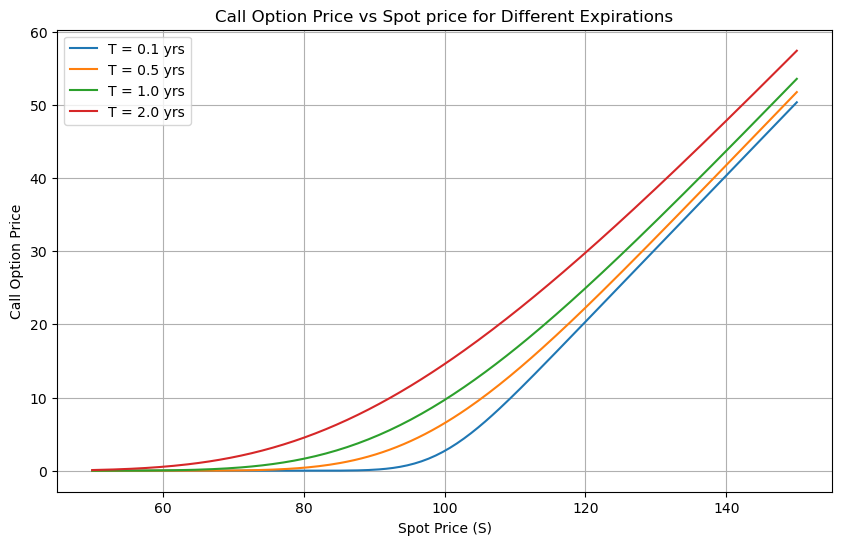

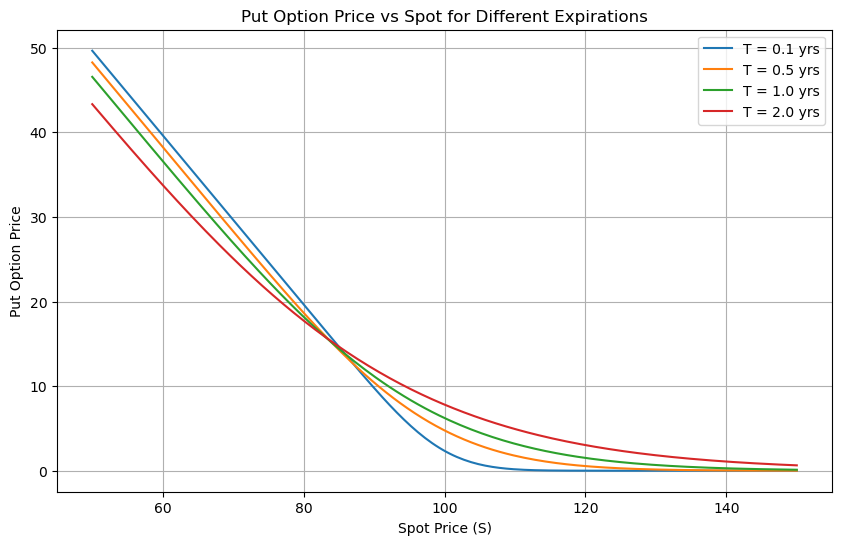

In [11]:
#parameters
K = 100 #strike
sigma = 0.2 #volatility
r = 0.035 #risk-free rate 
S_vals = np.linspace(50, 150, 200) #Spot prices 
T_list = [0.1, 0.5, 1.0, 2.0] #different maturity

# Plot Call Prices
plt.figure(figsize=(10, 6))
for T in T_list:
    call_prices = [Black_Scholes_Call(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, call_prices, label=f"T = {T:.1f} yrs")

plt.title("Call Option Price vs Spot price for Different Expirations")
plt.xlabel("Spot Price (S)")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()


# Plot Put Prices
plt.figure(figsize=(10, 6))
for T in T_list:
    put_prices = [Black_Scholes_Put(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, put_prices, label=f"T = {T:.1f} yrs")

plt.title("Put Option Price vs Spot for Different Expirations")
plt.xlabel("Spot Price (S)")
plt.ylabel("Put Option Price")
plt.legend()
plt.grid(True)
plt.show()

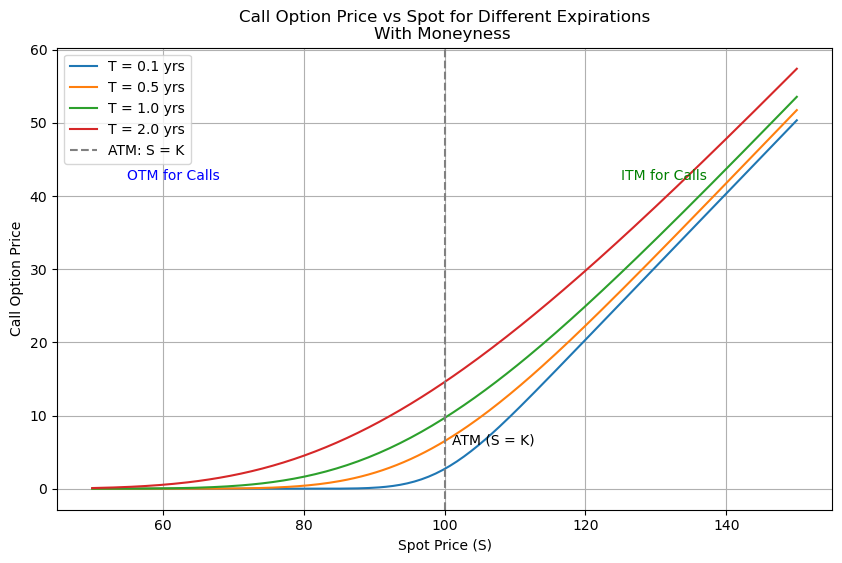

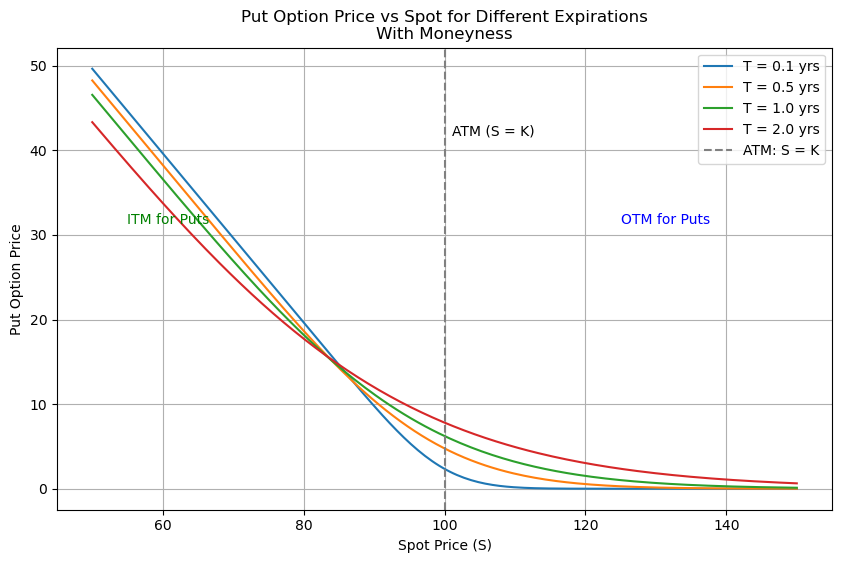

In [12]:
# parameters
K = 100 #strike
sigma = 0.2 #volatility
r = 0.035 #risk-free rate 
S_vals = np.linspace(50, 150, 200) #Spot prices 
T_list = [0.1, 0.5, 1.0, 2.0] #different maturity

# Plot call prices 
plt.figure(figsize=(10, 6))
for T in T_list:
    call_prices = [Black_Scholes_Call(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, call_prices, label=f"T = {T:.1f} yrs")

plt.axvline(K, color='gray', linestyle='--', linewidth=1.5, label="ATM: S = K")
plt.text(K + 1, plt.ylim()[1] * 0.1, 'ATM (S = K)', color='black')
plt.text(55, plt.ylim()[1] * 0.7, 'OTM for Calls', color='blue')
plt.text(125, plt.ylim()[1] * 0.7, 'ITM for Calls', color='green')

plt.title("Call Option Price vs Spot for Different Expirations\nWith Moneyness ")
plt.xlabel("Spot Price (S)")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()


# Plot Put Prices
plt.figure(figsize=(10, 6))
for T in T_list:
    put_prices = [Black_Scholes_Put(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, put_prices, label=f"T = {T:.1f} yrs")

# Moneyness annotations
plt.axvline(K, color='gray', linestyle='--', linewidth=1.5, label="ATM: S = K")
plt.text(K + 1, plt.ylim()[1] * 0.8, 'ATM (S = K)', color='black')
plt.text(55, plt.ylim()[1] * 0.6, 'ITM for Puts', color='green')
plt.text(125, plt.ylim()[1] * 0.6, 'OTM for Puts', color='blue')

# Labels and legend
plt.title("Put Option Price vs Spot for Different Expirations\nWith Moneyness")
plt.xlabel("Spot Price (S)")
plt.ylabel("Put Option Price")
plt.legend()
plt.grid(True)
plt.show()

#### Option Price vs Time to expiration t

In [13]:
# Call options


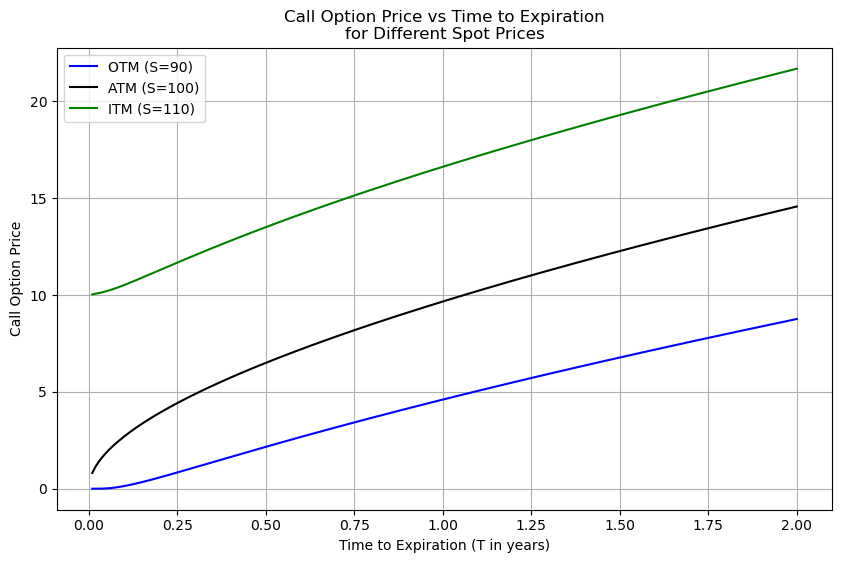

In [14]:
# parameters
K = 100 #strike 
sigma = 0.2 #volatility
r = 0.035 #risk-free rate

T_vals = np.linspace(0.01, 2, 200)
spot_levels = [90, 100, 110]  # OTM, ATM, ITM for calls
colors = ['blue', 'black', 'green']
labels = ['OTM (S=90)', 'ATM (S=100)', 'ITM (S=110)']

# Plot 
plt.figure(figsize=(10, 6))
for S, color, label in zip(spot_levels, colors, labels):
    prices = [Black_Scholes_Call(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, prices, label=label, color=color)

plt.title("Call Option Price vs Time to Expiration\nfor Different Spot Prices")
plt.xlabel("Time to Expiration (T in years)")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Put options

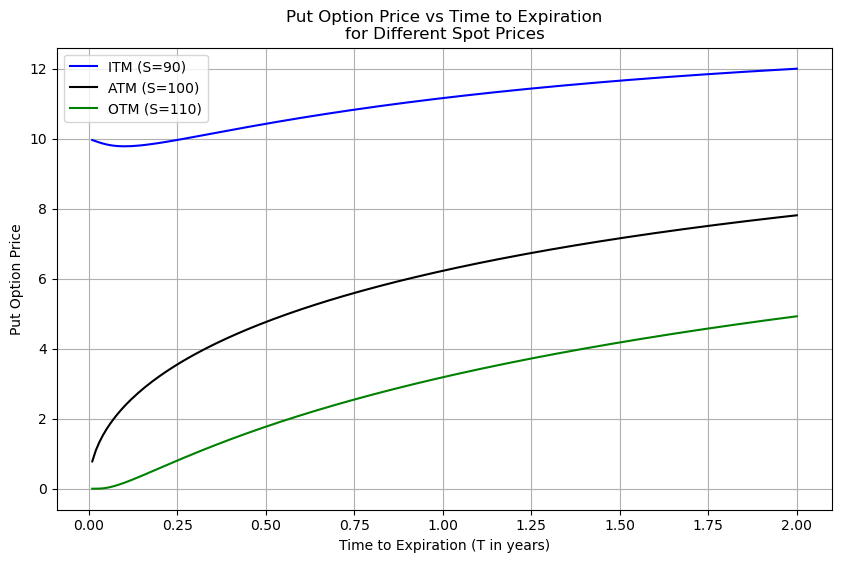

In [16]:
labels = ['ITM (S=90)', 'ATM (S=100)', 'OTM (S=110)']  # moneyness for puts

plt.figure(figsize=(10, 6))
for S, color, label in zip(spot_levels, colors, labels):
    prices = [Black_Scholes_Put(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, prices, label=label, color=color)

plt.title("Put Option Price vs Time to Expiration\nfor Different Spot Prices")
plt.xlabel("Time to Expiration (T in years)")
plt.ylabel("Put Option Price")
plt.legend()
plt.grid(True)
plt.show()

### Optio Greeks vs time to expiration t 


#### Call Option

In [17]:
# parameters
K = 100 #strike 
sigma = 0.2 #volatility
r = 0.035 #risk-free rate 
T_vals = np.linspace(0.01, 2.0, 200)
S_list = [90, 100, 110]  # moneyness
colors = ['blue', 'black', 'green']
labels = ['OTM (S=90)', 'ATM (S=100)', 'ITM (S=110)']

In [18]:
## Delta vs time to expiration

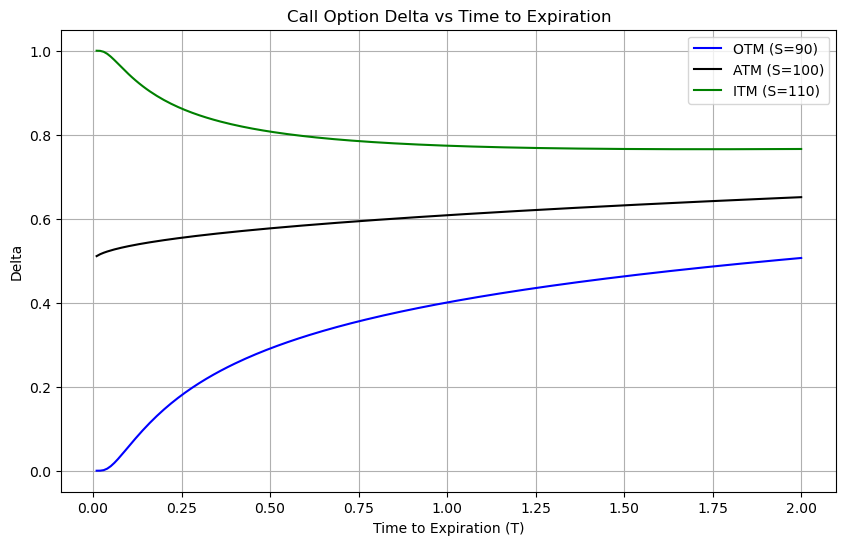

In [19]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    deltas = [Black_Scholes__Call_Delta(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, deltas, label=label, color=color)

plt.title("Call Option Delta vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
## Gamma vs time to expiration

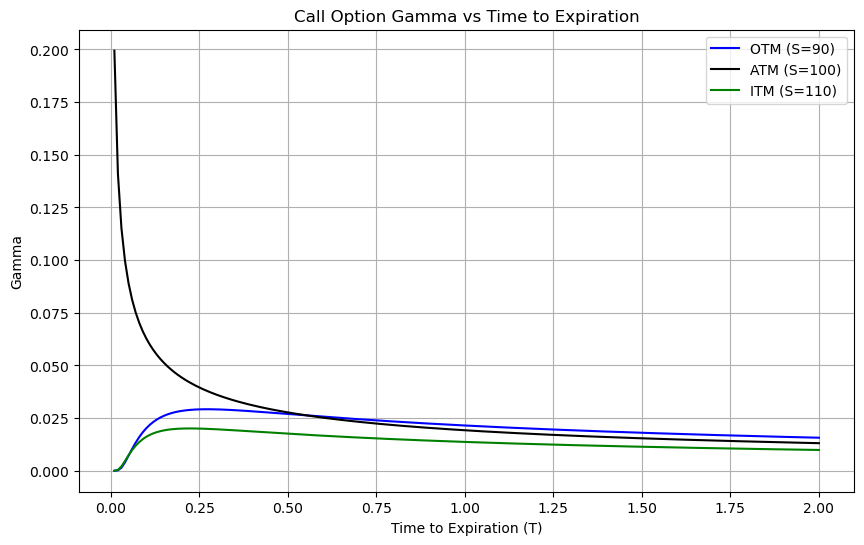

In [21]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    gammas = [Black_Scholes_Gamma(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, gammas, label=label, color=color)

plt.title("Call Option Gamma vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
## Vega vs time to expiration

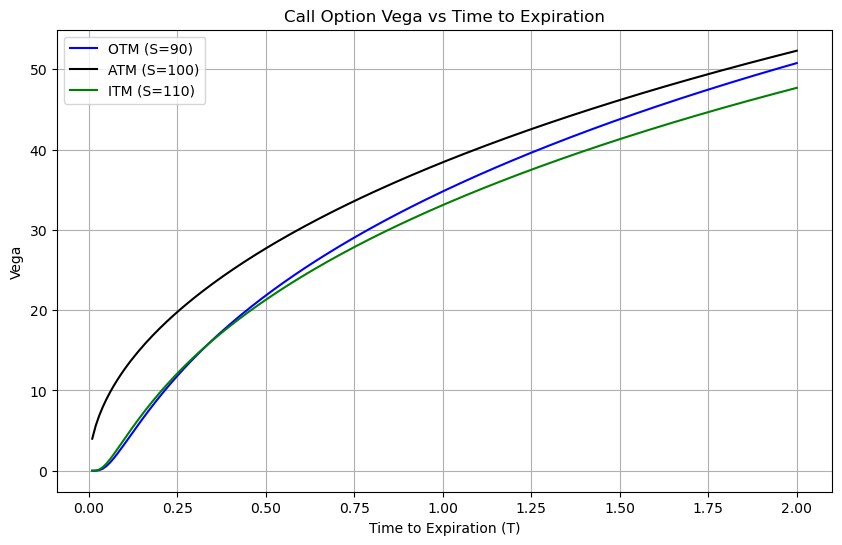

In [23]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    vegas = [Black_Scholes_Vega(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, vegas, label=label, color=color)

plt.title("Call Option Vega vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
## Theta vs time to expiration

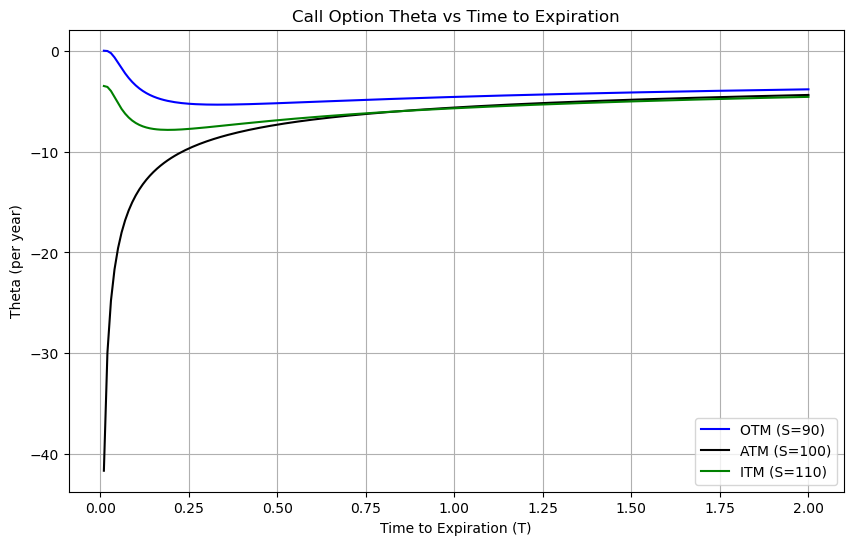

In [25]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    thetas = [Black_Scholes_Call_Theta(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, thetas, label=label, color=color)

plt.title("Call Option Theta vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Theta (per year)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
## Rho vs time to expiration

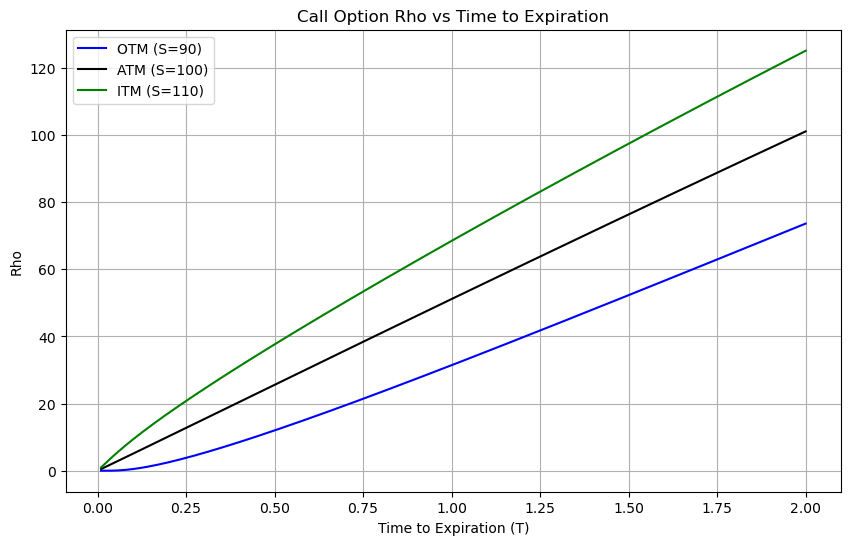

In [27]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    rhos = [Black_Scholes_Call_Rho(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, rhos, label=label, color=color)

plt.title("Call Option Rho vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


#### Greeks vs Time to Expiration for Put Options

In [28]:
# Parameters
K = 100  #strike 
sigma = 0.2 #volatility
r = 0.035 #risk-free rate 

T_vals = np.linspace(0.01, 2.0, 200)
S_list = [90, 100, 110]  # ITM, ATM, OTM for puts
colors = ['green', 'black', 'blue']
labels = ['ITM (S=90)', 'ATM (S=100)', 'OTM (S=110)']

In [29]:
## Delta vs time to expiration

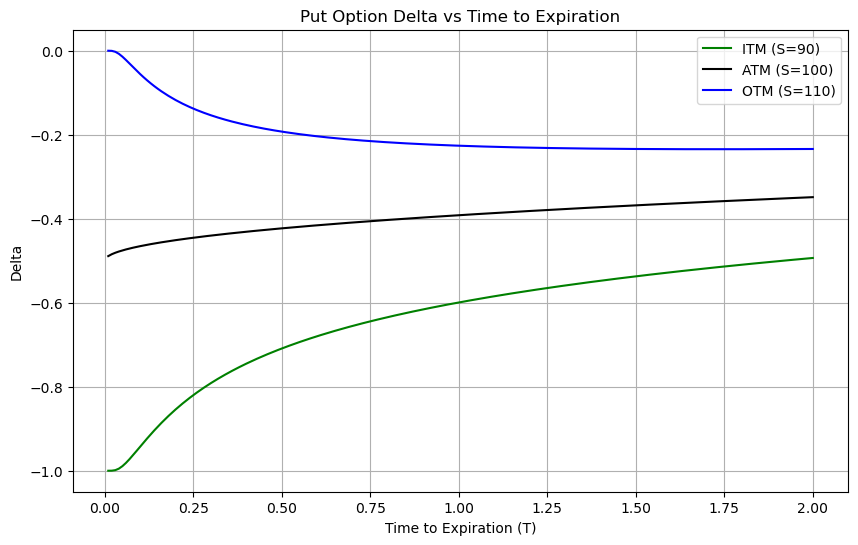

In [30]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    deltas = [Black_Scholes_Put_Delta(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, deltas, label=label, color=color)

plt.title("Put Option Delta vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
## Gamma vs time to expiration

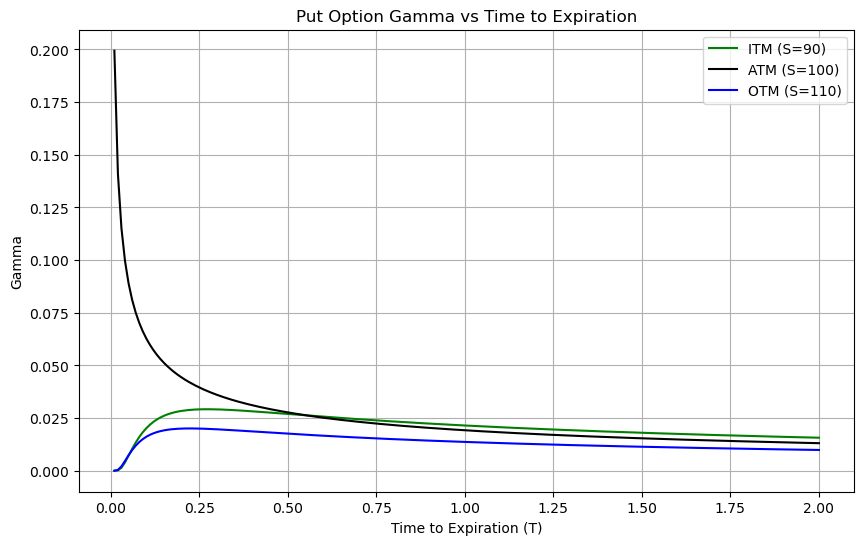

In [32]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    gammas = [Black_Scholes_Gamma(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, gammas, label=label, color=color)

plt.title("Put Option Gamma vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
## Vega vs time to expiration 

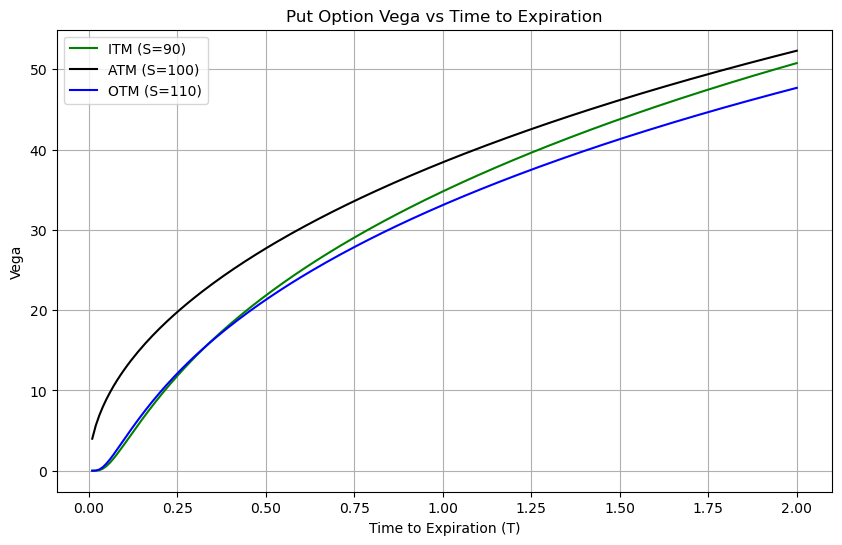

In [34]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    vegas = [Black_Scholes_Vega(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, vegas, label=label, color=color)

plt.title("Put Option Vega vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
## Theta vs time to expiration

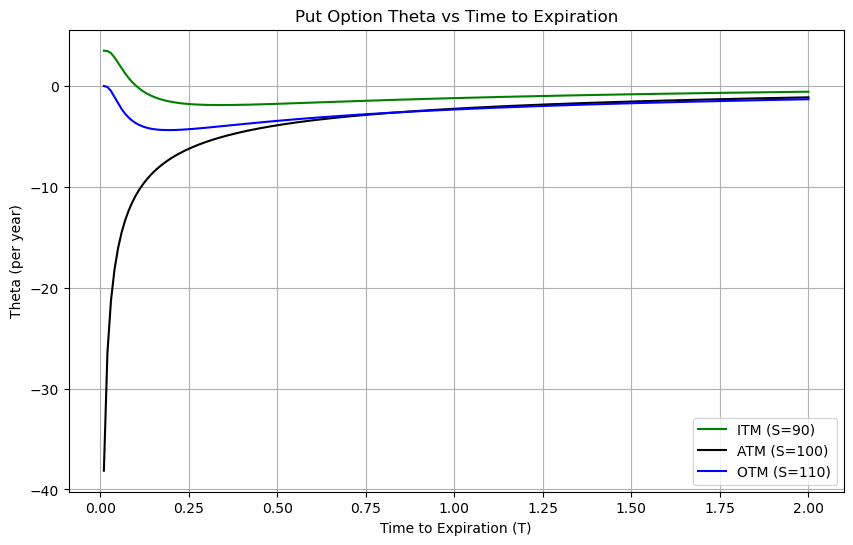

In [36]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    thetas = [Black_Scholes_Put_Theta(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, thetas, label=label, color=color)

plt.title("Put Option Theta vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Theta (per year)")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
## Rho vs time to expiration

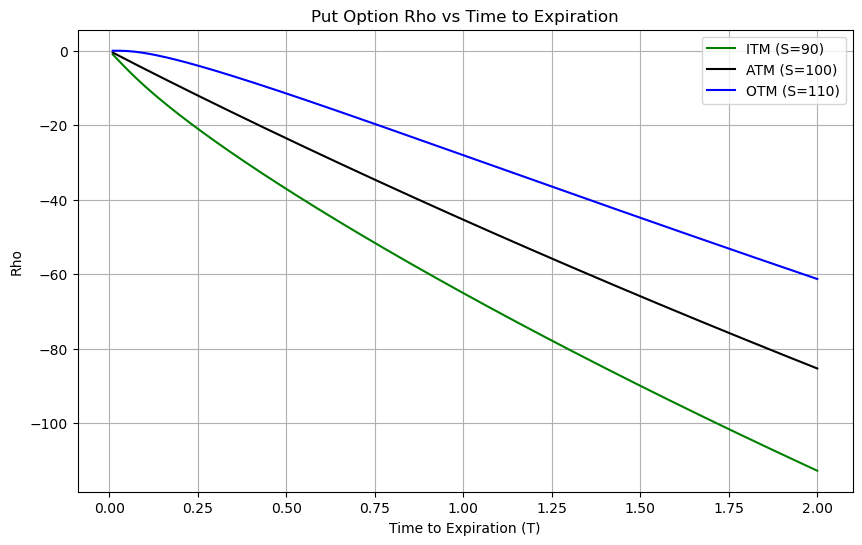

In [38]:
plt.figure(figsize=(10, 6))
for S, color, label in zip(S_list, colors, labels):
    rhos = [Black_Scholes_Put_Rho(S, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, rhos, label=label, color=color)

plt.title("Put Option Rho vs Time to Expiration")
plt.xlabel("Time to Expiration (T)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


###  Option Greeks vs Spot Price S

#### Call options

In [39]:
# parameters
K = 100
sigma = 0.2
r = 0.035
S_vals = np.linspace(50, 150, 300)
T_list = [0.1, 0.5, 1.0]
colors = ['red', 'black', 'green']
labels = [f"T = {T}" for T in T_list]




In [40]:
## Delta vs Spot 

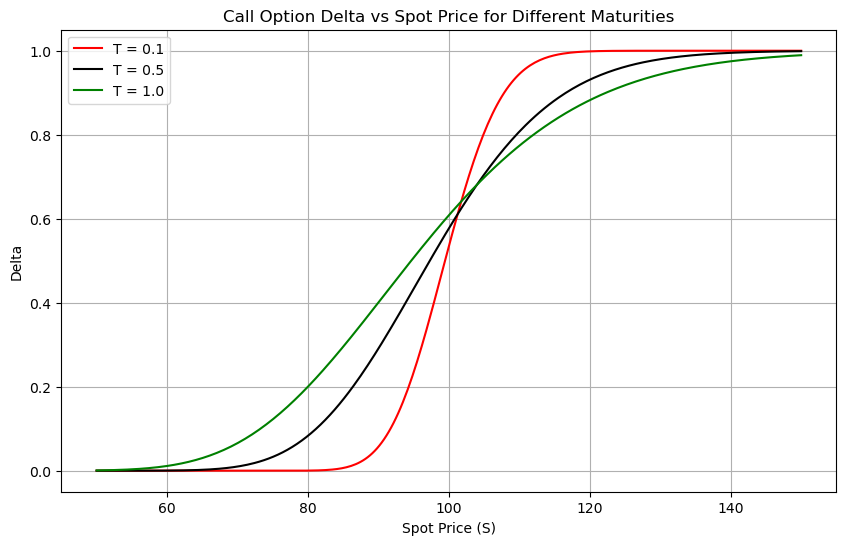

In [41]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    deltas = [Black_Scholes__Call_Delta(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, deltas, label=label, color=color)

plt.title("Call Option Delta vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
## Gamma vs Spot 

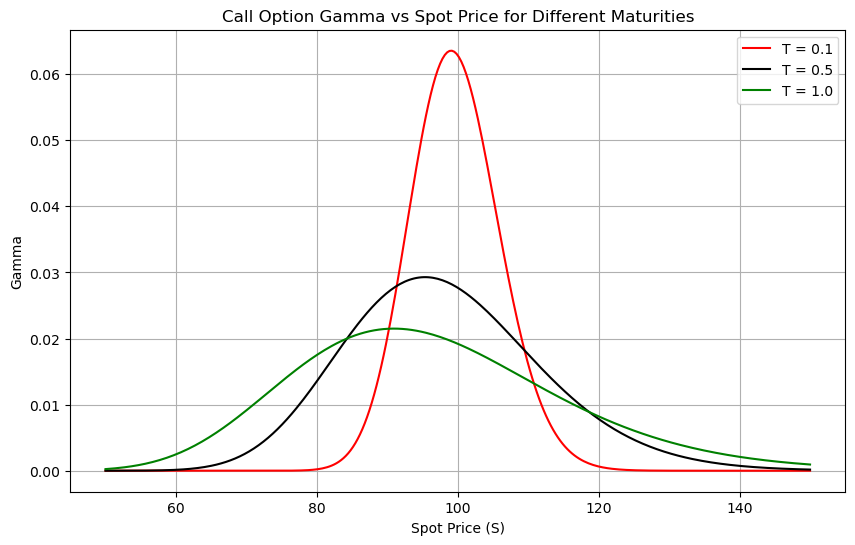

In [43]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    gammas = [Black_Scholes_Gamma(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, gammas, label=label, color=color)

plt.title("Call Option Gamma vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
## vega vs Spot

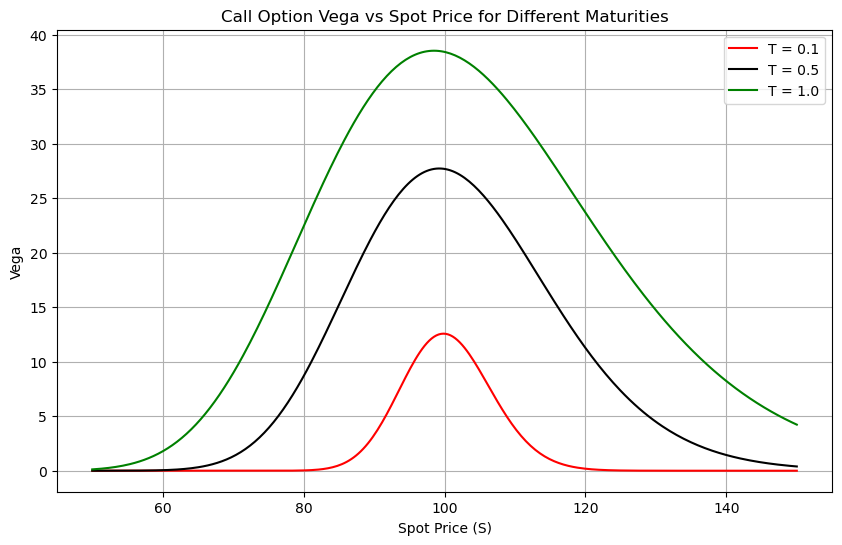

In [45]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    vegas = [Black_Scholes_Vega(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, vegas, label=label, color=color)

plt.title("Call Option Vega vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
## theta vs spot 

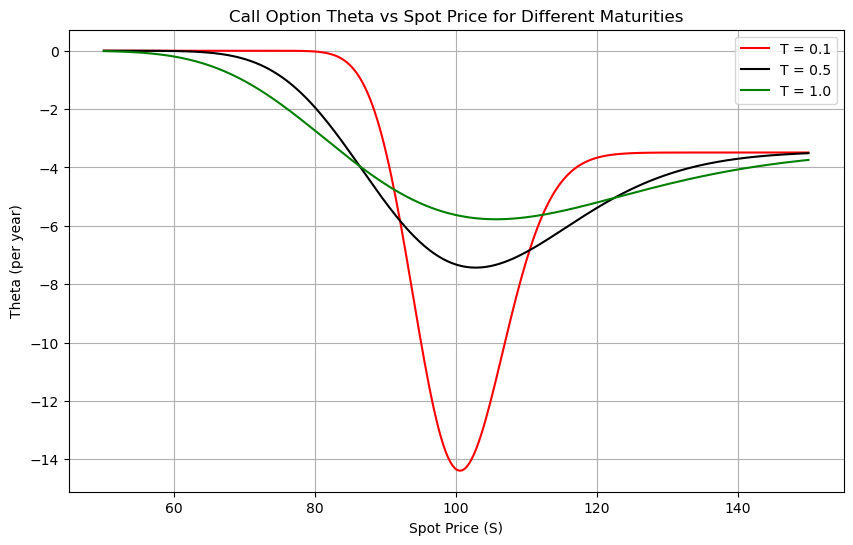

In [47]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    thetas = [Black_Scholes_Call_Theta(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, thetas, label=label, color=color)

plt.title("Call Option Theta vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Theta (per year)")
plt.legend()
plt.grid(True)
plt.show()


In [48]:
## Rho vs Spot 

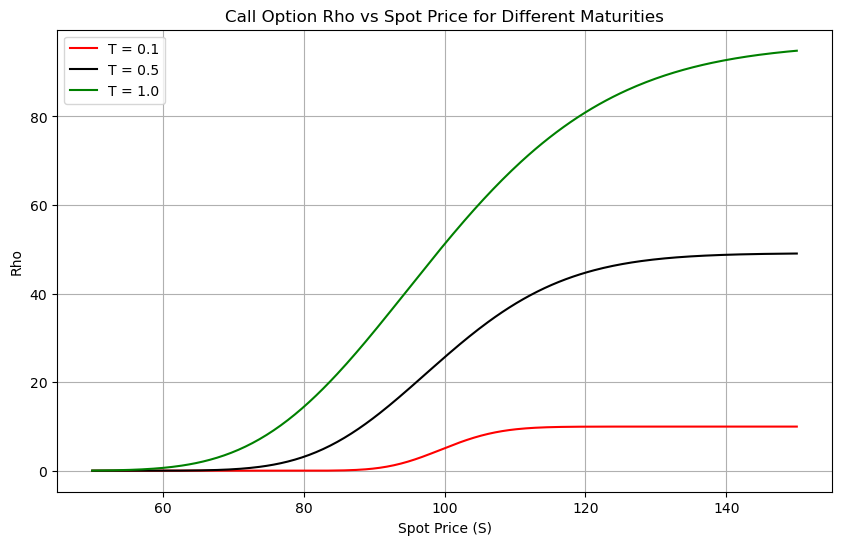

In [49]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    rhos = [Black_Scholes_Call_Rho(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, rhos, label=label, color=color)

plt.title("Call Option Rho vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


#### Put Options

In [50]:
# Parameters
K = 100
sigma = 0.2
r = 0.035
S_vals = np.linspace(50, 150, 300)
T_list = [0.1, 0.5, 1.0]  # Short, medium, long term
colors = ['red', 'black', 'green']
labels = [f"T = {T}" for T in T_list]

In [51]:
## Delta vs Spot 

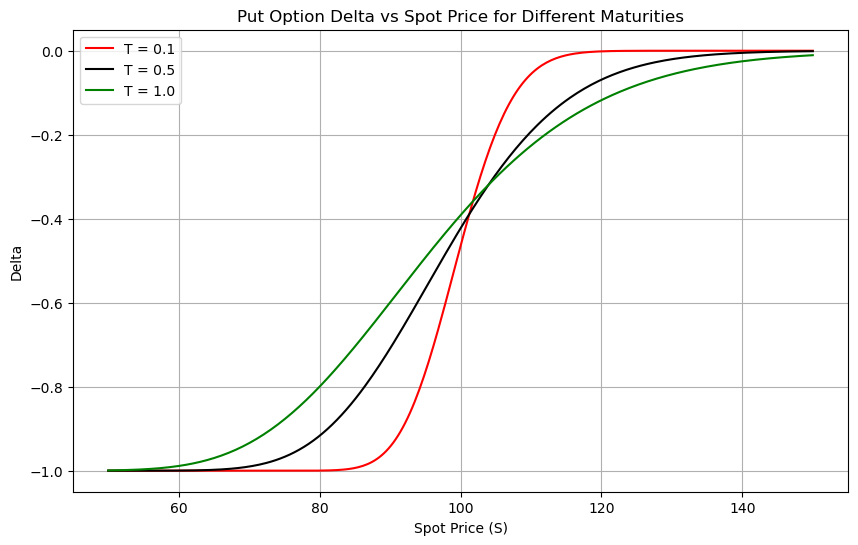

In [52]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    deltas = [Black_Scholes_Put_Delta(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, deltas, label=label, color=color)

plt.title("Put Option Delta vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
## Gamma vs Spot 

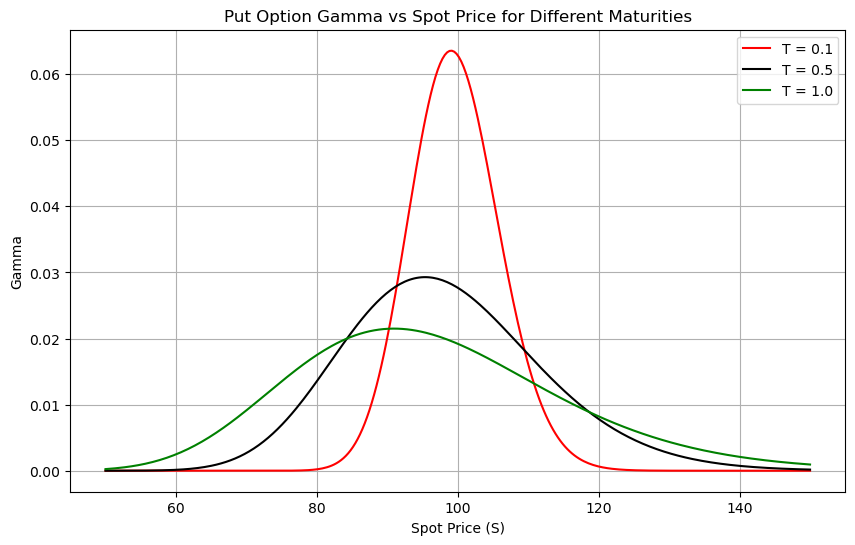

In [54]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    gammas = [Black_Scholes_Gamma(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, gammas, label=label, color=color)

plt.title("Put Option Gamma vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
## Vega vs Spot 

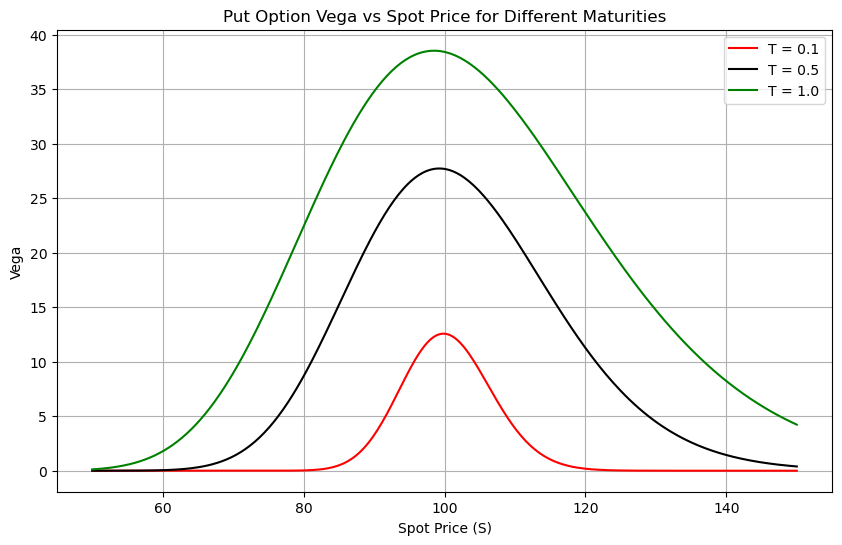

In [56]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    vegas = [Black_Scholes_Vega(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, vegas, label=label, color=color)

plt.title("Put Option Vega vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
## Theta vs Spot 

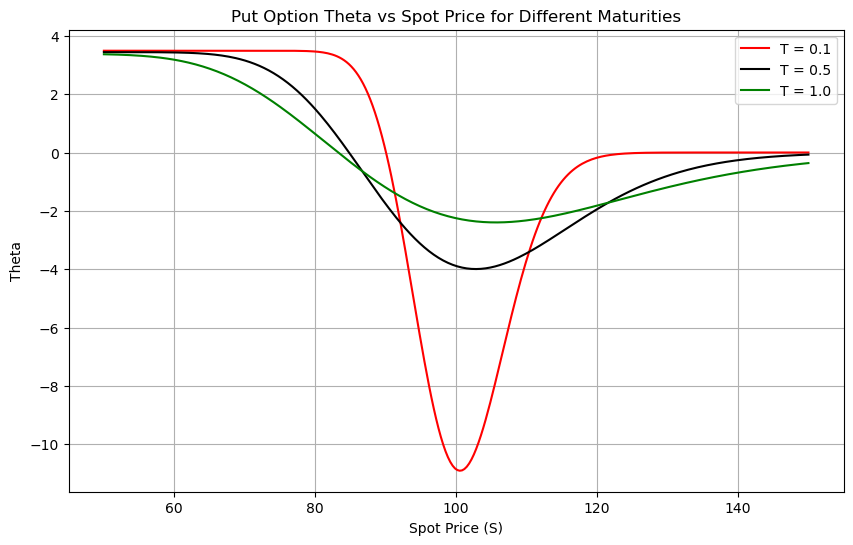

In [58]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    thetas = [Black_Scholes_Put_Theta(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, thetas, label=label, color=color)

plt.title("Put Option Theta vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()


In [59]:
## Rho vs Spot 

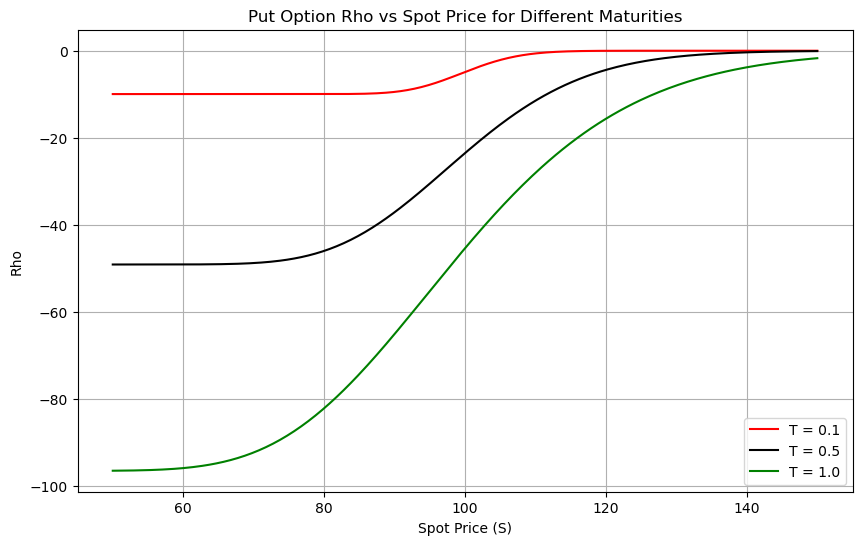

In [60]:
plt.figure(figsize=(10, 6))
for T, color, label in zip(T_list, colors, labels):
    rhos = [Black_Scholes_Put_Rho(S, K, sigma, T, r) for S in S_vals]
    plt.plot(S_vals, rhos, label=label, color=color)

plt.title("Put Option Rho vs Spot Price for Different Maturities")
plt.xlabel("Spot Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)


plt.show()


#### Greeks vs Spot Price - Black-Scholes model 

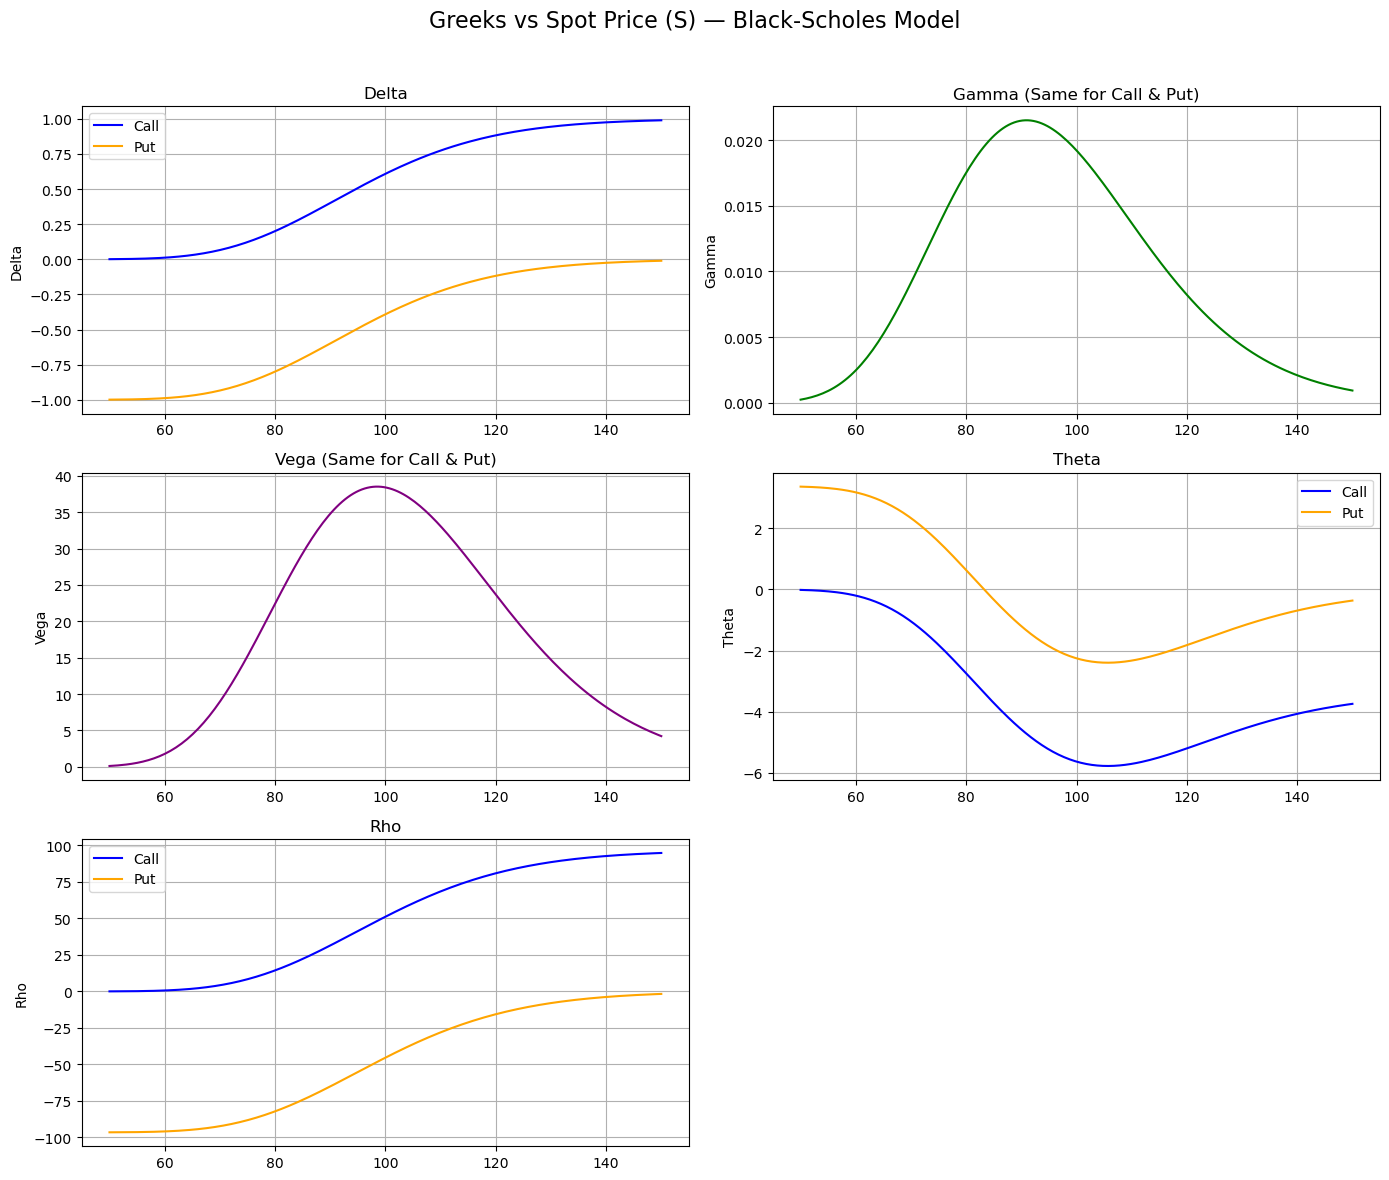

In [61]:
# Parameters
S_vals = np.linspace(50, 150, 200)
K = 100
t = 1
r = 0.035
sigma = 0.2


# Compute Greeks
delta_calls = [Black_Scholes__Call_Delta(S, K, sigma, t, r) for S in S_vals]
delta_puts  = [Black_Scholes_Put_Delta(S, K, sigma, t, r) for S in S_vals]
gamma_vals  = [Black_Scholes_Gamma(S, K, sigma, t, r) for S in S_vals]
vega_vals   = [Black_Scholes_Vega(S, K, sigma, t, r) for S in S_vals]
theta_calls = [Black_Scholes_Call_Theta(S, K, sigma, t, r) for S in S_vals]
theta_puts  = [Black_Scholes_Put_Theta(S, K, sigma, t, r) for S in S_vals]
rho_calls   = [Black_Scholes_Call_Rho(S, K, sigma, t, r) for S in S_vals]
rho_puts    = [Black_Scholes_Put_Rho(S, K, sigma, t, r) for S in S_vals]

# Plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Greeks vs Spot Price (S) — Black-Scholes Model", fontsize=16)

# Delta
axs[0, 0].plot(S_vals, delta_calls, label="Call", color='blue')
axs[0, 0].plot(S_vals, delta_puts, label="Put", color='orange')
axs[0, 0].set_title("Delta")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gamma
axs[0, 1].plot(S_vals, gamma_vals, color='green')
axs[0, 1].set_title("Gamma (Same for Call & Put)")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].grid(True)

# Vega
axs[1, 0].plot(S_vals, vega_vals, color='purple')
axs[1, 0].set_title("Vega (Same for Call & Put)")
axs[1, 0].set_ylabel("Vega")
axs[1, 0].grid(True)

# Theta
axs[1, 1].plot(S_vals, theta_calls, label="Call", color='blue')
axs[1, 1].plot(S_vals, theta_puts, label="Put", color='orange')
axs[1, 1].set_title("Theta")
axs[1, 1].set_ylabel("Theta")
axs[1, 1].legend()
axs[1, 1].grid(True)

# Rho
axs[2, 0].plot(S_vals, rho_calls, label="Call", color='blue')
axs[2, 0].plot(S_vals, rho_puts, label="Put", color='orange')
axs[2, 0].set_title("Rho")
axs[2, 0].set_ylabel("Rho")
axs[2, 0].legend()
axs[2, 0].grid(True)


# Hide unused subplot
axs[2, 1].axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Greeks vs Time to Expiration — Call Option

In [62]:
# Fixed parameters
S0 = 100
K = 100
sigma = 0.2
r = 0.035

t_vals = np.linspace(0.01, 2, 200)  # Avoid t = 0 for numerical stability

# Compute Greeks vs Time
deltas = [Black_Scholes__Call_Delta(S0, K, sigma, t, r) for t in t_vals]
gammas = [Black_Scholes_Gamma(S0, K, sigma, t, r) for t in t_vals]
vegas  = [Black_Scholes_Vega(S0, K, sigma, t, r) for t in t_vals]
thetas = [Black_Scholes_Call_Theta(S0, K, sigma, t, r) for t in t_vals]
rhos   = [Black_Scholes_Call_Rho(S0, K, sigma, t, r) for t in t_vals]


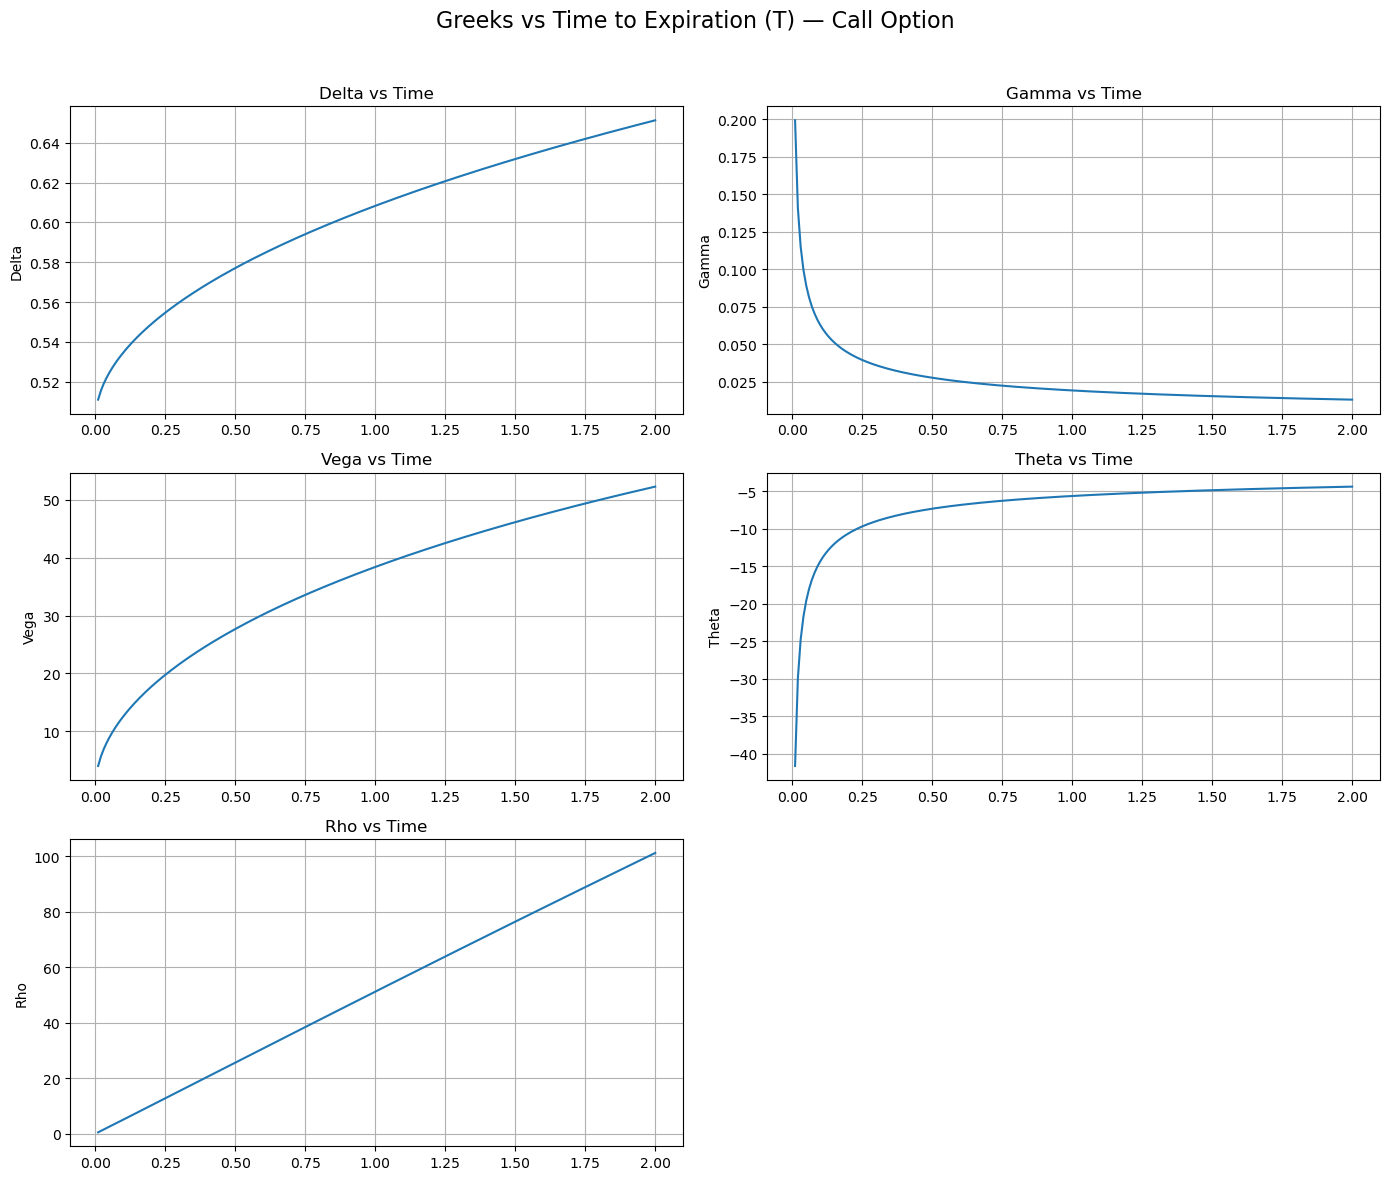

In [63]:
# Plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Greeks vs Time to Expiration (T) — Call Option", fontsize=16)

axs[0, 0].plot(t_vals, deltas)
axs[0, 0].set_title("Delta vs Time")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].grid(True)

axs[0, 1].plot(t_vals, gammas)
axs[0, 1].set_title("Gamma vs Time")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].grid(True)

axs[1, 0].plot(t_vals, vegas)
axs[1, 0].set_title("Vega vs Time")
axs[1, 0].set_ylabel("Vega")
axs[1, 0].grid(True)

axs[1, 1].plot(t_vals, thetas)
axs[1, 1].set_title("Theta vs Time")
axs[1, 1].set_ylabel("Theta")
axs[1, 1].grid(True)

axs[2, 0].plot(t_vals, rhos)
axs[2, 0].set_title("Rho vs Time")
axs[2, 0].set_ylabel("Rho")
axs[2, 0].grid(True)

axs[2, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [64]:
# Greeks vs Time to Expiration — Put Option

In [65]:
# Fixed parameters
S0 = 100
K = 100
sigma = 0.2
r = 0.035

t_vals = np.linspace(0.01, 2, 200)  # Avoid t = 0 for numerical stability

# Compute Greeks vs Time to expiration
deltas = [Black_Scholes_Put_Delta(S0, K, sigma, t, r) for t in t_vals]
gammas = [Black_Scholes_Gamma(S0, K, sigma, t, r) for t in t_vals]
vegas  = [Black_Scholes_Vega(S0, K, sigma, t, r) for t in t_vals]
thetas = [Black_Scholes_Put_Theta(S0, K, sigma, t, r) for t in t_vals]
rhos   = [Black_Scholes_Put_Rho(S0, K, sigma, t, r) for t in t_vals]


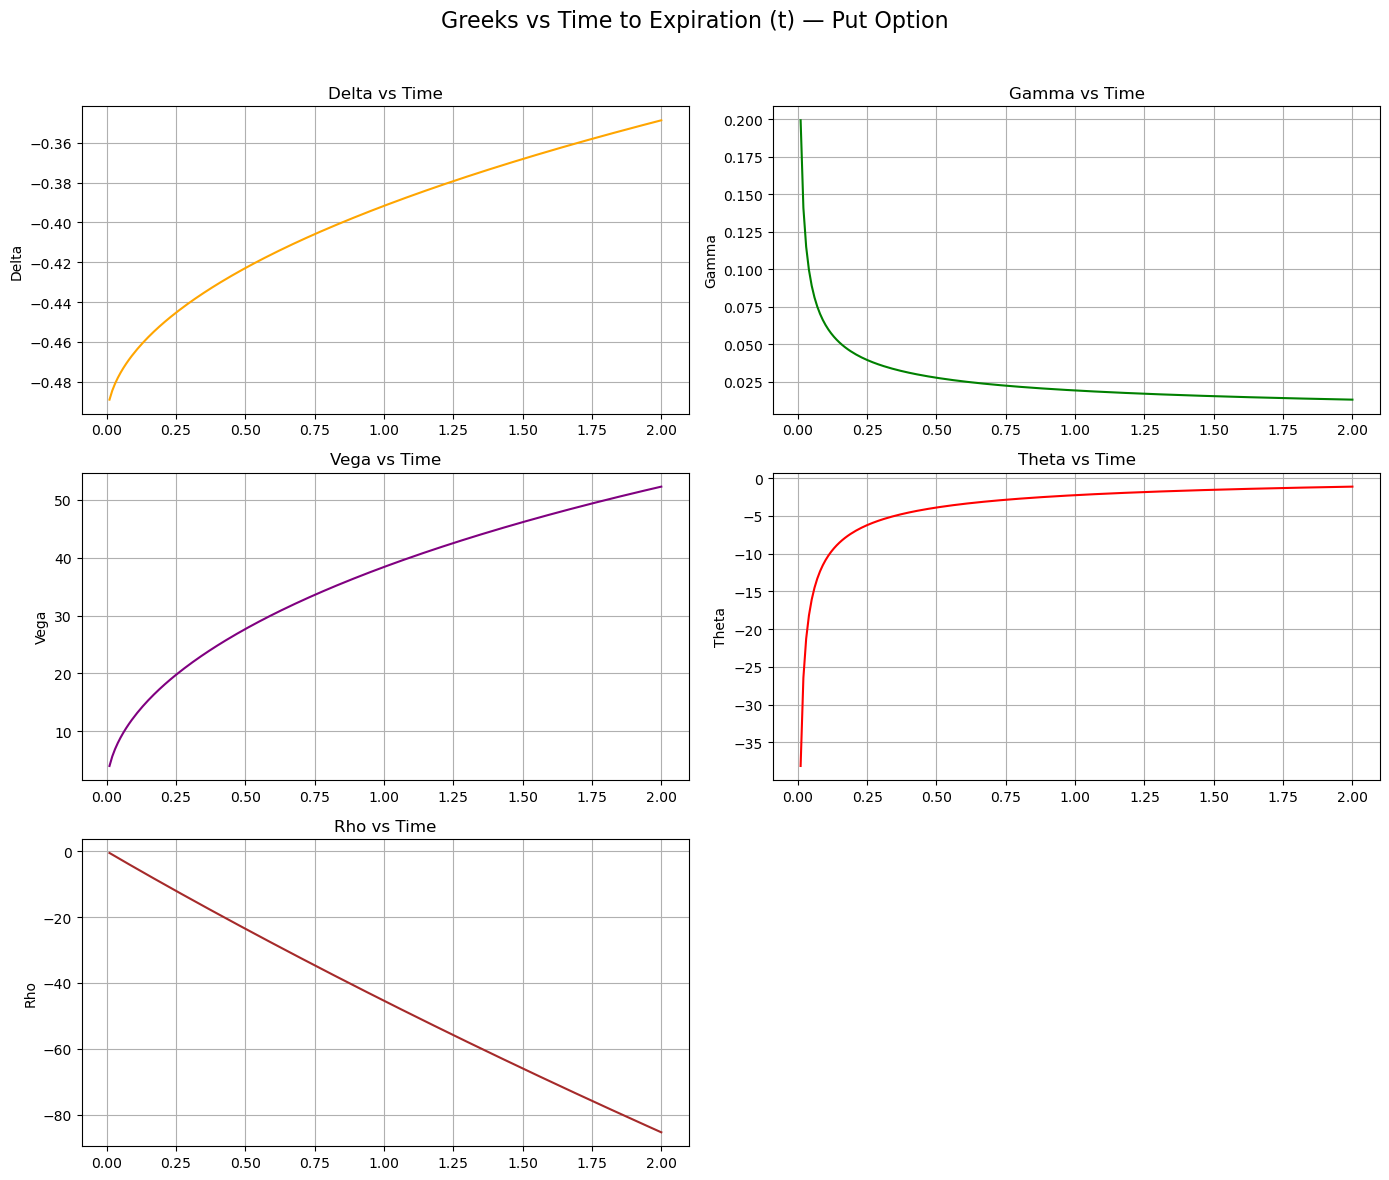

In [66]:
# Plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Greeks vs Time to Expiration (t) — Put Option", fontsize=16)

axs[0, 0].plot(t_vals, deltas, color='orange')
axs[0, 0].set_title("Delta vs Time")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].grid(True)

axs[0, 1].plot(t_vals, gammas, color='green')
axs[0, 1].set_title("Gamma vs Time")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].grid(True)

axs[1, 0].plot(t_vals, vegas, color='purple')
axs[1, 0].set_title("Vega vs Time")
axs[1, 0].set_ylabel("Vega")
axs[1, 0].grid(True)

axs[1, 1].plot(t_vals, thetas, color='red')
axs[1, 1].set_title("Theta vs Time")
axs[1, 1].set_ylabel("Theta")
axs[1, 1].grid(True)

axs[2, 0].plot(t_vals, rhos, color='brown')
axs[2, 0].set_title("Rho vs Time")
axs[2, 0].set_ylabel("Rho")
axs[2, 0].grid(True)

axs[2, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Numerical greeks for options and comparison to analytical greeks

#### Numerical Greek Function

In [67]:
def numerical_greek(func, param_name, param_val, bump, method='central', **kwargs):
    kwargs_up = kwargs.copy()
    kwargs_dn = kwargs.copy()
    kwargs_up[param_name] = param_val + bump
    kwargs_dn[param_name] = param_val - bump

    f_plus = func(**kwargs_up)
    f = func(**kwargs)
    f_minus = func(**kwargs_dn)

    if method == 'forward':
        return (f_plus - f) / bump
    elif method == 'backward':
        return (f - f_minus) / bump
    elif method == 'central':
        return (f_plus - f_minus) / (2 * bump)
    else:
        raise ValueError("Method must be 'forward', 'backward', or 'central'")


In [68]:
# parameters
S = 100
K = 100
sigma = 0.2
t = 1.0
r = 0.035
bump = 1e-2


Compare Greeks for Call Option

In [69]:
results = []

# Delta
results.append({
    'Greek': 'Delta',
    'Analytical': Black_Scholes__Call_Delta(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Call, 'S0', S, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Gamma 
results.append({
    'Greek': 'Gamma',
    'Analytical': Black_Scholes_Gamma(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes__Call_Delta, 'S0', S, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Vega
results.append({
    'Greek': 'Vega',
    'Analytical': Black_Scholes_Vega(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Call, 'sigma', sigma, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Theta
results.append({
    'Greek': 'Theta',
    'Analytical': Black_Scholes_Call_Theta(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Call, 't', t, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Rho
results.append({
    'Greek': 'Rho',
    'Analytical': Black_Scholes_Call_Rho(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Call, 'r', r, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})



df = pd.DataFrame(results)
df["Absolute Error"] = abs(df["Analytical"] - df["Numerical"])
df



Greek  Analytical  Numerical  Absolute Error
0  Delta    0.608342   0.608342    7.601584e-09
1  Gamma    0.019207   0.019207    5.436849e-10
2   Vega   38.413892  38.412264    1.627343e-03
3  Theta   -5.632224   5.632274    1.126450e+01
4    Rho   51.166721  51.159973    6.748026e-03

Compare Greeks for Put options 

In [70]:
results_put = []

# Delta
results_put.append({
    'Greek': 'Delta',
    'Analytical': Black_Scholes_Put_Delta(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Put, 'S0', S, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Gamma (via Delta derivative)
results_put.append({
    'Greek': 'Gamma',
    'Analytical': Black_Scholes_Gamma(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Put_Delta, 'S0', S, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Vega
results_put.append({
    'Greek': 'Vega',
    'Analytical': Black_Scholes_Vega(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Put, 'sigma', sigma, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Theta
results_put.append({
    'Greek': 'Theta',
    'Analytical': Black_Scholes_Put_Theta(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Put, 't', t, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})

# Rho
results_put.append({
    'Greek': 'Rho',
    'Analytical': Black_Scholes_Put_Rho(S, K, sigma, t, r),
    'Numerical': numerical_greek(Black_Scholes_Put, 'r', r, bump, method='central',
                                  S0=S, K=K, sigma=sigma, t=t, r=r)
})



df_put = pd.DataFrame(results_put)
df_put["Absolute Error"] = abs(df_put["Analytical"] - df_put["Numerical"])
df_put


Greek  Analytical  Numerical  Absolute Error
0  Delta   -0.391658  -0.391658    7.602806e-09
1  Gamma    0.019207   0.019207    5.436849e-10
2   Vega   38.413892  38.412264    1.627343e-03
3  Theta   -2.252605   2.252655    4.505261e+00
4    Rho  -45.393821 -45.402178    8.357376e-03

## Module 2: Monte Carlo Pricing of European Options with Greeks

In [71]:
from functions_Monte_Carlo import simulate_gbm_paths, monte_carlo_price_european_option
import matplotlib.pyplot as plt
import numpy as np

In [72]:
# Option and simulation parameters

S0 = 100         # Initial stock price
K = 100          # Strike price
r = 0.035         # Risk-free rate
sigma = 0.2      # Volatility
T = 1.0          # Time to maturity (in years)
n_steps = 252    # Time steps (daily for 1 year)
n_paths = 10000  # Number of Monte Carlo simulation paths
seed = 42        # Reproducibility


Visualize Simulated GBM Paths

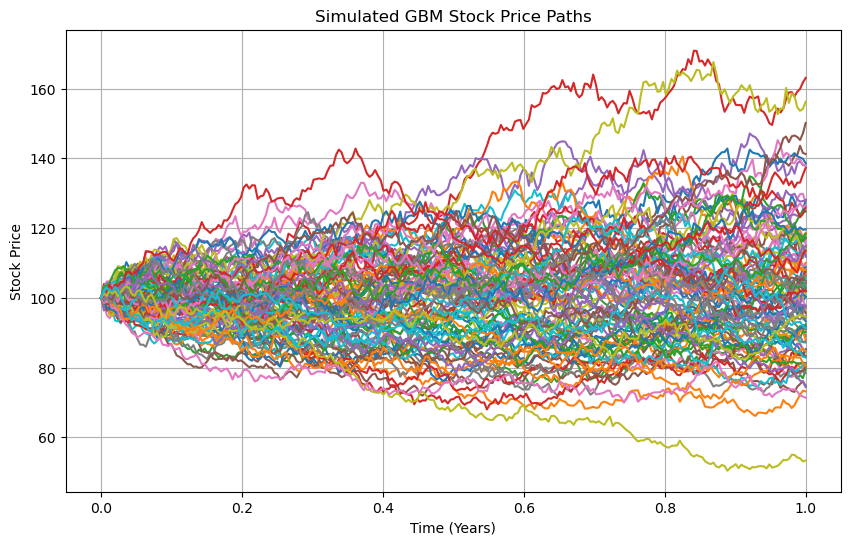

In [73]:
# Simulate 100 paths for visualization
times, paths = simulate_gbm_paths(S0, r, sigma, T, n_steps, n_paths=100, seed=seed)

# Plot
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(times, paths[i], label=f"Path {i+1}")
plt.title("Simulated GBM Stock Price Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


 Monte Carlo Option Pricing with Confidence Intervals

In [74]:
# Call option price with standard error
price_call, std_call = monte_carlo_price_european_option(S0, K, T, r, sigma,
                                                         n_steps, n_paths,
                                                         option_type='call',
                                                         seed=seed,
                                                         return_std=True)

# Put option price with standard error
price_put, std_put = monte_carlo_price_european_option(S0, K, T, r, sigma,
                                                       n_steps, n_paths,
                                                       option_type='put',
                                                       seed=seed,
                                                       return_std=True)

# Print results
print(f"Monte Carlo Call Price: {price_call:.4f} ± {1.96*std_call:.4f} (95% CI) with standard error {std_call}")
print(f"Monte Carlo Put Price:  {price_put:.4f} ± {1.96*std_put:.4f} (95% CI) with standard error {std_put}")


Monte Carlo Call Price: 9.4348 ± 0.2746 (95% CI) with standard error 0.14012071340748197
Monte Carlo Put Price:  6.1804 ± 0.1805 (95% CI) with standard error 0.09211575654648055


Convergence Plot

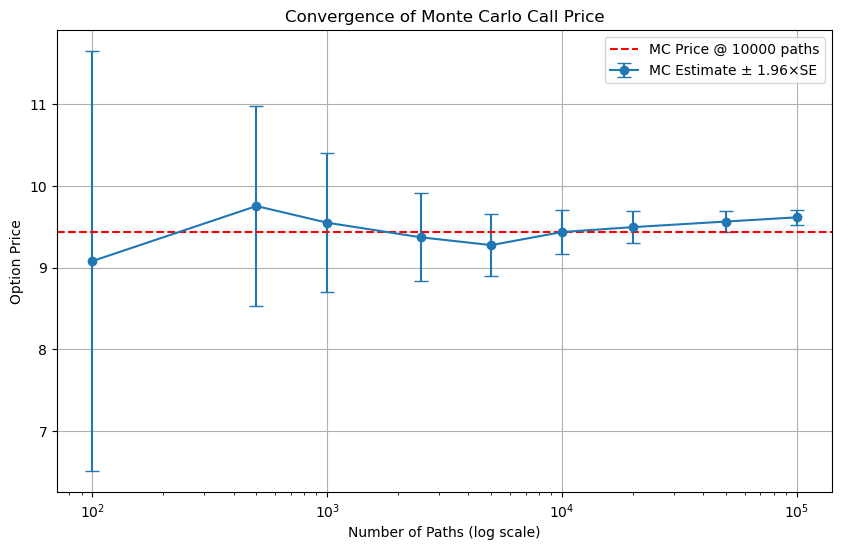

In [75]:
# List of different path counts to test convergence
paths_list = [100, 500, 1000, 2500, 5000, 10000, 20000,50000,100000]
prices_call = []
errors_call = []

for n in paths_list:
    price, err = monte_carlo_price_european_option(S0, K, T, r, sigma,
                                                   n_steps, n,
                                                   option_type='call',
                                                   seed=seed,
                                                   return_std=True)
    prices_call.append(price)
    errors_call.append(err)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.errorbar(paths_list, prices_call,
             yerr=[1.96 * np.array(errors_call)],
             fmt='o-', capsize=5, label="MC Estimate ± 1.96×SE")
plt.axhline(y=price_call, color='red', linestyle='--', label='MC Price @ 10000 paths')
plt.title("Convergence of Monte Carlo Call Price")
plt.xlabel("Number of Paths (log scale)")
plt.ylabel("Option Price")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()


Adding more and more simulations to a Monte-Carlo simulation is a way to improve accuracy.

### Comparison of Black-Scholes Price and Monte Carlo extimated Price 

In [76]:
bs_call = Black_Scholes_Call(S0, K, sigma, T, r)
mc_call, std_call = monte_carlo_price_european_option(S0, K, T, r, sigma,
                                                         n_steps, n_paths,
                                                         option_type='call',
                                                         seed=seed,
                                                         return_std=True)

bs_put = Black_Scholes_Put(S0, K, sigma, T, r)
mc_put, std_put = monte_carlo_price_european_option(S0, K, T, r, sigma,
                                                       n_steps, n_paths,
                                                       option_type='put',
                                                       seed=seed,
                                                       return_std=True)



print(f"Black-Scholes Call Price: {bs_call:.4f}")
print('----------'*5)
print(f"Monte Carlo estimated Call Price: {mc_call:.4f}")
print('----------'*10)
print(f"Black-Scholes Put Price:  {bs_put:.4f}")
print('----------'*5)
print(f"Monte Carlo estimated Put Price: {mc_put:.4f}")


Black-Scholes Call Price: 9.6675
--------------------------------------------------
Monte Carlo estimated Call Price: 9.4348
----------------------------------------------------------------------------------------------------
Black-Scholes Put Price:  6.2280
--------------------------------------------------
Monte Carlo estimated Put Price: 6.1804


The results of the Monte Carlo simulation reveal close approximations to the Black-Scholes prices for both call and put options. However, even seemingly minor variations between these values can have substantial ramifications, particularly in the realm of options trading and risk management.

### Improving Monte-Carlo Methods: Variance Reduction
Adding more and more simulations to a Monte-Carlo simulation is a way to improve accuracy, but increase computational time. Introducing variance reduction in Monte Carlo simulations improves accuracy without significantly increasing computation time.

###  Monte Carlo with Antithetic Variates (Variance Reduction)

In [159]:
import numpy as np

def monte_carlo_price_antithetic(S0, K, T, r, sigma, n_steps, n_paths, option_type='call', seed=None, return_std=False):
    if seed is not None:
        np.random.seed(seed)

    dt = T / n_steps
    half_paths = n_paths // 2
    Z = np.random.randn(half_paths, n_steps)
    
    # Antithetic variates: Z and -Z
    Z_antithetic = np.vstack([Z, -Z])
    
    # Simulate GBM terminal prices using Z_antithetic
    log_returns = np.sum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_antithetic, axis=1)
    ST = S0 * np.exp(log_returns)

    # Compute payoffs
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Discounted payoff
    discounted = np.exp(-r * T) * payoff
    price = np.mean(discounted)
    std = np.std(discounted, ddof=1) / np.sqrt(n_paths)

    if return_std:
        return price, std
    else:
        return price


In [160]:
# Parameters
S0 = 100          # Initial stock price
K = 100           # Strike price
r = 0.035          # Risk-free rate
sigma = 0.2       # Volatility
T = 1.0           # Time to maturity (in years)
n_steps = 252     # Daily steps
n_paths = 10000   # Simulation paths
seed = 42         # Random seed


call_anti, call_anti_std = monte_carlo_price_antithetic(S0, K, T, r, sigma,
                                                              n_steps, n_paths,
                                                              'call', seed=seed,
                                                              return_std=True)
put_anti, put_anti_std = monte_carlo_price_antithetic(S0, K, T, r, sigma,
                                                              n_steps, n_paths,
                                                              'put', seed=seed,
                                                              return_std=True)

print(f"Antithetic Call: {call_anti:.4f} ± {1.96 * call_anti_std:.4f}")
print(f"Antithetic Put: {put_anti:.4f} ± {1.96 * call_anti_std:.4f}")


Antithetic Call: 9.5645 ± 0.2797
Antithetic Put: 6.1411 ± 0.2797


###  Monte Carlo with Control Variates (Variance Reduction)

Monte Carlo option pricing with control variate technique uses E[S_T] as the control (known expectation under risk-neutral measure).

In [154]:
import numpy as np

def monte_carlo_price_control_variate(S0, K, T, r, sigma, n_steps, n_paths, option_type='call', seed=None, return_std=False):
    if seed is not None:
        np.random.seed(seed)

    dt = T / n_steps
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)

    # Generate Z and simulate GBM terminal prices
    Z = np.random.randn(n_paths, n_steps)
    ST = S0 * np.exp(np.sum(nudt + sigsdt * Z, axis=1))  # Fast path generation

    # Option payoff
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Control variate: use ST with known expectation
    expected_ST = S0 * np.exp(r * T)
    cov = np.cov(payoff, ST)[0, 1]
    var = np.var(ST)
    b = cov / var

    # Adjusted payoff
    adj_payoff = payoff - b * (ST - expected_ST)
    discounted = np.exp(-r * T) * adj_payoff

    price = np.mean(discounted)
    std = np.std(discounted, ddof=1) / np.sqrt(n_paths)

    if return_std:
        return price, std
    else:
        return price


In [155]:
# Parameters
S0 = 100          # Initial stock price
K = 100           # Strike price
r = 0.035          # Risk-free rate
sigma = 0.2       # Volatility
T = 1.0           # Time to maturity (in years)
n_steps = 252     # Daily steps
n_paths = 10000   # Simulation paths
seed = 42         # Random seed

#call_bs = Black_Scholes_Call(S0, K, sigma, T, r)
call_cv, call_cv_std = monte_carlo_price_control_variate(S0, K, T, r, sigma,
                                                               n_steps, n_paths,
                                                               'call', seed=seed,
                                                               return_std=True)
put_cv, put_cv_std = monte_carlo_price_control_variate(S0, K, T, r, sigma,
                                                               n_steps, n_paths,
                                                               'put', seed=seed,
                                                               return_std=True)

print(f"Control Variate Call Option Price : {call_cv:.4f} ± {1.96 * call_cv_std:.4f}")
print(f"Control Variate Put Option Price : {put_cv:.4f} ± {1.96 * put_cv_std:.4f}")



Control Variate Call Option Price : 9.5533 ± 0.1132
Control Variate Put Option Price : 6.1138 ± 0.1132


### Compare Call and Put Option Prices Using all 4 Methods

Next we will compute and compare European call and put option prices using:\
-Black-Scholes (Analytical)\
-Monte Carlo Standard\
-Monte Carlo Antithetic\
-Monte Carlo Control Variate


In [146]:
# Parameters
S0 = 100          # Initial stock price
K = 100           # Strike price
r = 0.035          # Risk-free rate
sigma = 0.2       # Volatility
T = 1.0           # Time to maturity (in years)
n_steps = 252     # Daily steps
n_paths = 10000   # Simulation paths
seed = 42         # Random seed


In [161]:
import time
results = []

# Black-Scholes
start = time.time()
call_bs = Black_Scholes_Call(S0, K, sigma, T, r)
put_bs = Black_Scholes_Put(S0, K, sigma, T, r)
results.append(['Black-Scholes', call_bs, '-', put_bs, '-', time.time() - start])

# MC Standard
start = time.time()
call_mc, call_mc_se = monte_carlo_price_european_option(
    S0, K, T, r, sigma, n_steps, n_paths, option_type='call', seed=seed, return_std=True
)

put_mc, put_mc_se = monte_carlo_price_european_option(
    S0, K, T, r, sigma, n_steps, n_paths, option_type='put', seed=seed, return_std=True
)

results.append(['MC Standard', call_mc, call_mc_se, put_mc, put_mc_se, time.time() - start])

# MC Antithetic
start = time.time()
call_anti, call_anti_se = monte_carlo_price_antithetic(S0, K, T, r, sigma,
                                                              n_steps, n_paths,
                                                              'call', seed=seed,
                                                              return_std=True)
put_anti, put_anti_se = monte_carlo_price_antithetic_fixed(S0, K, T, r, sigma,
                                                              n_steps, n_paths,
                                                              'put', seed=seed,
                                                              return_std=True)
results.append(['MC Antithetic', call_anti, call_anti_se, put_anti, put_anti_se, time.time() - start])

# MC Control Variate
start = time.time()
call_cv, call_cv_se = monte_carlo_price_control_variate(S0, K, T, r, sigma,
                                                               n_steps, n_paths,
                                                               'call', seed=seed,
                                                               return_std=True)
put_cv, put_cv_se = monte_carlo_price_control_variate(S0, K, T, r, sigma,
                                                               n_steps, n_paths,
                                                               'put', seed=seed,
                                                               return_std=True)
results.append(['MC Control Variate', call_cv, call_cv_se, put_cv, put_cv_se, time.time() - start])

# ------------------------------
# Results Table
# ------------------------------
df_results = pd.DataFrame(results, columns=['Method', 'Call Price', 'Call StdErr', 'Put Price', 'Put StdErr', 'Time (s)'])
df_results


Method  Call Price Call StdErr  Put Price Put StdErr  Time (s)
0       Black-Scholes    9.667467           -   6.228009          -  0.000589
1         MC Standard    9.434777    0.140121   6.180445   0.092116  0.101467
2       MC Antithetic    9.564493      0.1427   6.141109   0.091682  0.028169
3  MC Control Variate    9.553291    0.057731   6.113815   0.057731  0.046319

#### Interpretation:
All MC methods are converging well to the Black-Scholes price. Control Variates clearly outperforms others in accuracy and variance reduction: (i)Lowest standard error, (ii)Fast execution time.
Antithetic is fast, but doesn’t reduce variance as effectively as CV. Standard MC is accurate but has highest error and is slowest.


#### Confidence Interval Table

In [164]:
# 95% confidence intervals
df_results['Call CI (95%)'] = df_results.apply(
    lambda row: '-' if row['Call StdErr'] == '-' else f"{row['Call Price']:.4f} ± {1.96 * row['Call StdErr']:.4f}",
    axis=1
)

df_results['Put CI (95%)'] = df_results.apply(
    lambda row: '-' if row['Put StdErr'] == '-' else f"{row['Put Price']:.4f} ± {1.96 * row['Put StdErr']:.4f}",
    axis=1
)

# Display the updated DataFrame
print(df_results)


               Method  Call Price Call StdErr  Put Price Put StdErr  Time (s)  \
0       Black-Scholes    9.667467           -   6.228009          -  0.000589   
1         MC Standard    9.434777    0.140121   6.180445   0.092116  0.101467   
2       MC Antithetic    9.564493      0.1427   6.141109   0.091682  0.028169   
3  MC Control Variate    9.553291    0.057731   6.113815   0.057731  0.046319   

     Call CI (95%)     Put CI (95%)  
0                -                -  
1  9.4348 ± 0.2746  6.1804 ± 0.1805  
2  9.5645 ± 0.2797  6.1411 ± 0.1797  
3  9.5533 ± 0.1132  6.1138 ± 0.1132  


#### Convergence Plot (MC Paths vs Error)
This plot shows how the standard error decreases as the number of paths increases.


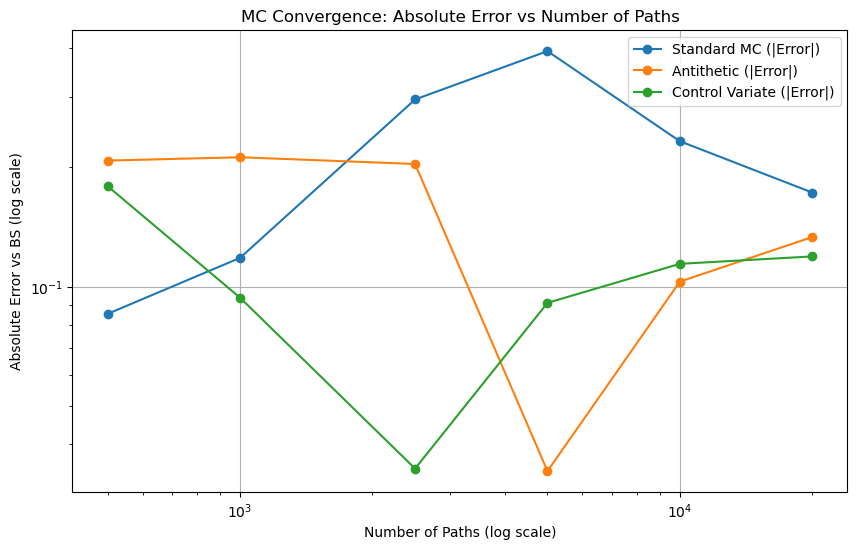

In [166]:
import matplotlib.pyplot as plt

path_counts = [500, 1000, 2500, 5000, 10000, 20000]
bs_call = Black_Scholes_Call(S0, K, sigma, T, r)

methods = {
    'Standard MC': monte_carlo_price_european_option,
    'Antithetic': monte_carlo_price_antithetic,
    'Control Variate': monte_carlo_price_control_variate,
}

errors = {method: [] for method in methods}
stds = {method: [] for method in methods}

for n in path_counts:
    for name, func in methods.items():
        price, se = func(S0, K, T, r, sigma, n_steps, n, option_type='call', seed=42, return_std=True)
        errors[name].append(abs(price - bs_call))
        stds[name].append(se)

# Plot
plt.figure(figsize=(10, 6))
for name in methods:
    plt.plot(path_counts, errors[name], marker='o', label=f'{name} (|Error|)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Paths (log scale)')
plt.ylabel('Absolute Error vs BS (log scale)')
plt.title('MC Convergence: Absolute Error vs Number of Paths')
plt.legend()
plt.grid(True)
plt.show()


#### Standard Error vs Number of Paths
This shows how each Monte Carlo method's standard error decreases as you increase the number of simulation paths.

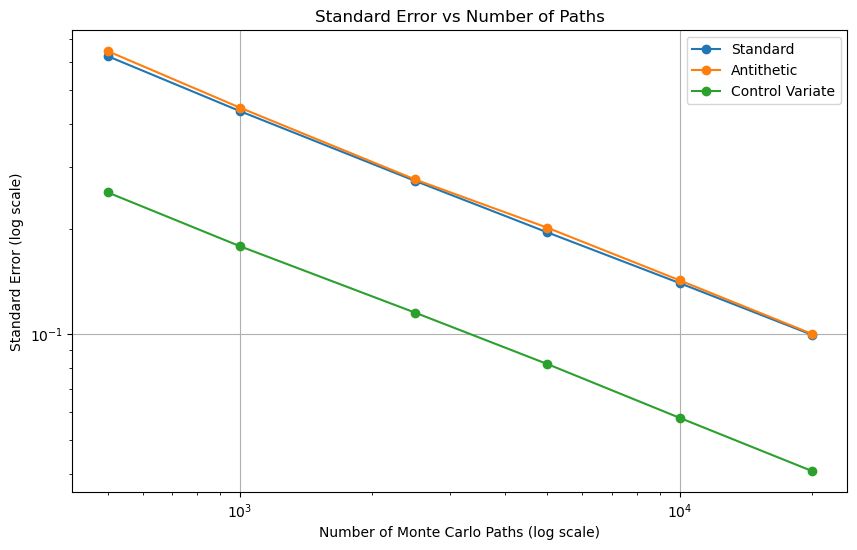

In [167]:
import matplotlib.pyplot as plt

# Recompute for a range of path sizes
path_sizes = [500, 1000, 2500, 5000, 10000, 20000]
std_errors = {'Standard': [], 'Antithetic': [], 'Control Variate': []}

for n in path_sizes:
    _, se_std = monte_carlo_price_european_option(S0, K, T, r, sigma, n_steps, n, 'call', seed=42, return_std=True)
    _, se_anti = monte_carlo_price_antithetic(S0, K, T, r, sigma, n_steps, n, 'call', seed=42, return_std=True)
    _, se_cv   = monte_carlo_price_control_variate(S0, K, T, r, sigma, n_steps, n, 'call', seed=42, return_std=True)

    std_errors['Standard'].append(se_std)
    std_errors['Antithetic'].append(se_anti)
    std_errors['Control Variate'].append(se_cv)

# Plotting
plt.figure(figsize=(10,6))
for label, values in std_errors.items():
    plt.plot(path_sizes, values, marker='o', label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Monte Carlo Paths (log scale)')
plt.ylabel('Standard Error (log scale)')
plt.title('Standard Error vs Number of Paths')
plt.legend()
plt.grid(True)
plt.show()


Our results show that:

- All methods approximate the Black-Scholes price well.
- **Control variates** achieved the lowest standard error and fastest convergence.
- **Antithetic variates** reduced variance modestly with improved efficiency.
- **Standard MC** had the highest error and variance.

The module demonstrates how statistical techniques can significantly improve Monte Carlo simulations, making them more reliable for option pricing.

#### Monte Carlo Greeks

In [169]:
def monte_carlo_greek_fd(param_name, param_val, bump, pricing_func, method='central', **kwargs):
    """
    Computes a numerical Greek using finite difference methods for a given parameter.

    Parameters:
        param_name (str): Name of the parameter to bump (e.g., 'S0', 'sigma', 'r', 'T')
        param_val (float): Base value of the parameter
        bump (float): Size of the bump
        pricing_func (function): Monte Carlo pricing function
        method (str): 'forward', 'backward', or 'central'
        **kwargs: Additional arguments for pricing_func

    Returns:
        float: Estimated Greek
    """
    kwargs_copy = kwargs.copy()
    kwargs_copy[param_name] = param_val
    base_price = pricing_func(**kwargs_copy)

    if method == 'forward':
        kwargs_copy[param_name] = param_val + bump
        bumped_price = pricing_func(**kwargs_copy)
        greek = (bumped_price - base_price) / bump

    elif method == 'backward':
        kwargs_copy[param_name] = param_val - bump
        bumped_price = pricing_func(**kwargs_copy)
        greek = (base_price - bumped_price) / bump

    elif method == 'central':
        kwargs_up = kwargs.copy()
        kwargs_down = kwargs.copy()
        kwargs_up[param_name] = param_val + bump
        kwargs_down[param_name] = param_val - bump
        price_up = pricing_func(**kwargs_up)
        price_down = pricing_func(**kwargs_down)
        greek = (price_up - price_down) / (2 * bump)

    else:
        raise ValueError("Method must be 'forward', 'backward', or 'central'.")

    return greek

def monte_carlo_gamma(S0, bump, pricing_func, **kwargs):
    """
    Estimates Gamma (second derivative w.r.t. spot price) using central finite difference.

    Parameters:
        S0 (float): Base spot price
        bump (float): Bump size for spot price
        pricing_func (function): Option pricing function
        **kwargs: Other parameters to pass to pricing function

    Returns:
        float: Gamma
    """
    kwargs_up = kwargs.copy()
    kwargs_mid = kwargs.copy()
    kwargs_down = kwargs.copy()

    kwargs_up['S0'] = S0 + bump
    kwargs_mid['S0'] = S0
    kwargs_down['S0'] = S0 - bump

    price_up = pricing_func(**kwargs_up)
    price_mid = pricing_func(**kwargs_mid)
    price_down = pricing_func(**kwargs_down)

    gamma = (price_up - 2 * price_mid + price_down) / (bump ** 2)
    return gamma


Monte Carlo Greeks for Call and Put Options

In [173]:
params_call = {
    'S0': 100,
    'K': 100,
    'T': 1.0,
    'r': 0.035,
    'sigma': 0.2,
    'n_steps': 252,
    'n_paths': 100000,
    'option_type': 'call',
    'seed': 42
}

params_put = params_call.copy()
params_put['option_type'] = 'put'

# Bumps for finite differences
bump_dict = {'S0': 0.5, 'sigma': 0.01, 'r': 0.005, 'T': 1/365}


Call option greeks 

In [174]:
# Delta, Vega, Rho, Theta
delta_call_mc = monte_carlo_greek_fd('S0', params_call['S0'], bump_dict['S0'], monte_carlo_price_european_option, method='central', **params_call)
vega_call_mc = monte_carlo_greek_fd('sigma', params_call['sigma'], bump_dict['sigma'], monte_carlo_price_european_option, method='central', **params_call)
rho_call_mc = monte_carlo_greek_fd('r', params_call['r'], bump_dict['r'], monte_carlo_price_european_option, method='central', **params_call)
theta_call_mc = -monte_carlo_greek_fd('T', params_call['T'], bump_dict['T'], monte_carlo_price_european_option, method='central', **params_call)

# Gamma
params_call_gamma = params_call.copy()
params_call_gamma.pop('S0')  # Remove S0 to avoid duplication

gamma_call_mc = monte_carlo_gamma(S0=params_call['S0'], bump=bump_dict['S0'],
                                  pricing_func=monte_carlo_price_european_option, **params_call_gamma)



Put option greeks

In [176]:
# Delta, Vega, Rho, Theta
delta_put_mc = monte_carlo_greek_fd('S0', params_put['S0'], bump_dict['S0'], monte_carlo_price_european_option, method='central', **params_put)
vega_put_mc = monte_carlo_greek_fd('sigma', params_put['sigma'], bump_dict['sigma'], monte_carlo_price_european_option, method='central', **params_put)
rho_put_mc = monte_carlo_greek_fd('r', params_put['r'], bump_dict['r'], monte_carlo_price_european_option, method='central', **params_put)
theta_put_mc = -monte_carlo_greek_fd('T', params_put['T'], bump_dict['T'], monte_carlo_price_european_option, method='central', **params_put)

# Gamma
params_put_gamma = params_put.copy()
params_put_gamma.pop('S0')  # Remove S0 to avoid duplication

gamma_put_mc = monte_carlo_gamma(S0=params_put['S0'], bump=bump_dict['S0'],
                                  pricing_func=monte_carlo_price_european_option, **params_call_gamma)


Results

In [179]:
df_mc_greeks = pd.DataFrame({
    'Greek': ['Delta', 'Gamma', 'Vega', 'Rho', 'Theta'],
    'Call Option': [delta_call_mc, gamma_call_mc, vega_call_mc, rho_call_mc, theta_call_mc],
    'Put Option': [delta_put_mc, gamma_put_mc, vega_put_mc, rho_put_mc, theta_put_mc]
})

df_mc_greeks

Greek  Call Option  Put Option
0  Delta     0.608545   -0.391160
1  Gamma     0.019674    0.019674
2   Vega    38.075019   38.286450
3    Rho    51.239965  -45.320979
4  Theta    -5.601226   -2.242750

Compairing greeks

In [181]:
#Call option

In [187]:
df_compare_call_full = pd.DataFrame({
    'Greek': ['Delta', 'Gamma', 'Vega', 'Rho', 'Theta'],
    'Analytical (BS)': df['Analytical'].values,
    'Numerical (BS FD)': df['Numerical'].values,
    'Monte Carlo': [delta_call_mc, gamma_call_mc, vega_call_mc, theta_call_mc, rho_call_mc]
})
display(df_compare_call_full)

Greek  Analytical (BS)  Numerical (BS FD)  Monte Carlo
0  Delta         0.608342           0.608342     0.608545
1  Gamma         0.019207           0.019207     0.019674
2   Vega        38.413892          38.412264    38.075019
3    Rho        -5.632224           5.632274    -5.601226
4  Theta        51.166721          51.159973    51.239965

In [184]:
#Put options

In [188]:
df_compare_put_full = pd.DataFrame({
    'Greek': ['Delta', 'Gamma', 'Vega', 'Rho', 'Theta'],
    'Analytical (BS)': df_put['Analytical'].values,
    'Numerical (BS FD)': df_put['Numerical'].values,
    'Monte Carlo': [delta_put_mc, gamma_put_mc, vega_put_mc, theta_put_mc, rho_put_mc]
})
display(df_compare_put_full)

Greek  Analytical (BS)  Numerical (BS FD)  Monte Carlo
0  Delta        -0.391658          -0.391658    -0.391160
1  Gamma         0.019207           0.019207     0.019674
2   Vega        38.413892          38.412264    38.286450
3    Rho        -2.252605           2.252655    -2.242750
4  Theta       -45.393821         -45.402178   -45.320979

The analytical, numerical (finite difference), and Monte Carlo estimates of Greeks for European options show strong agreement across all methods. Minor deviations in Vega and Gamma are expected due to path variability, confirming the robustness of the Monte Carlo approach.

## Module 3: Local Volatility Modeling

Synthetic Implied Volatility (IV) Surface

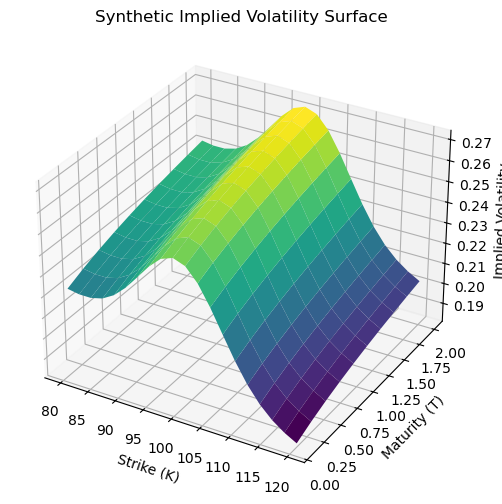

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Create strike and maturity grid
strikes = np.linspace(80, 120, 20)
maturities = np.linspace(0.1, 2.0, 10)
K, T = np.meshgrid(strikes, maturities)

# Synthetic implied volatility surface (smile effect)
def synthetic_iv_surface(K, T, S0=100):
    base_vol = 0.2
    skew = -0.001 * (K - S0)
    smile = 0.05 * np.exp(-((K - S0)/10)**2)
    term_structure = 0.02 * np.log1p(T)
    return base_vol + skew + smile + term_structure

IV = synthetic_iv_surface(K, T)

# Plot the implied volatility surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K, T, IV, cmap='viridis')
ax.set_xlabel("Strike (K)")
ax.set_ylabel("Maturity (T)")
ax.set_zlabel("Implied Volatility")
ax.set_title("Synthetic Implied Volatility Surface")
plt.show()


#### Estimate local volatilities using Dupire's formula

Compute the option price grid using the implied vol surface:

In [195]:
strikes = np.linspace(80, 120, 20)           # 20 strikes
maturities = np.linspace(0.1, 2.0, 10)       # 10 maturities
K, T = np.meshgrid(strikes, maturities, indexing='ij')  # shape (20,10)

IV = synthetic_iv_surface(K, T)

call_prices = np.zeros_like(IV)
S0 = 100
r = 0.05

for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        strike = K[i, j]
        maturity = T[i, j]
        sigma = IV[i, j]
        call_prices[i, j] = Black_Scholes_Call(S0, strike, sigma, maturity, r)


In [192]:
#compute local volatility surface

In [196]:
def compute_local_vol_surface(K_vals, T_vals, call_prices, r):
    nK = len(K_vals)
    nT = len(T_vals)
    local_vol = np.full((nK, nT), np.nan)

    for i in range(1, nK - 1):
        for j in range(1, nT - 1):
            K = K_vals[i]
            T = T_vals[j]

            # First derivatives
            dC_dT = (call_prices[i, j + 1] - call_prices[i, j - 1]) / (T_vals[j + 1] - T_vals[j - 1])
            dC_dK = (call_prices[i + 1, j] - call_prices[i - 1, j]) / (K_vals[i + 1] - K_vals[i - 1])

            # Second derivative w.r.t K
            d2C_dK2 = (call_prices[i + 1, j] - 2 * call_prices[i, j] + call_prices[i - 1, j]) / (
                (K_vals[i + 1] - K_vals[i]) ** 2
            )

            numerator = dC_dT + r * K * dC_dK
            denominator = 0.5 * K**2 * d2C_dK2

            if denominator > 1e-8 and numerator > 0:
                local_vol[i, j] = np.sqrt(numerator / denominator)

    return local_vol


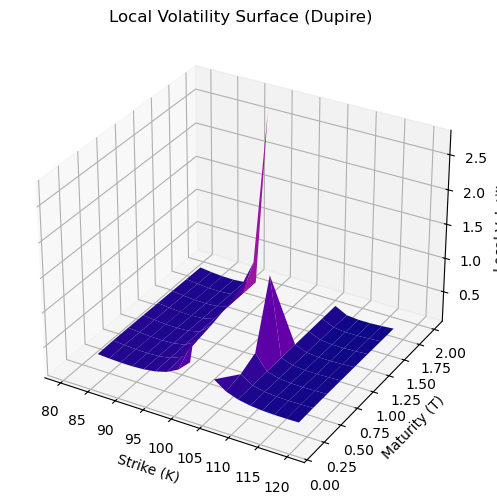

In [213]:
local_vol = compute_local_vol_surface(strikes, maturities, call_prices, r)


# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
K_plot, T_plot = np.meshgrid(strikes, maturities, indexing='ij')
ax.plot_surface(K_plot, T_plot, local_vol, cmap='plasma')
ax.set_xlabel("Strike (K)")
ax.set_ylabel("Maturity (T)")
ax.set_zlabel("Local Volatility")
ax.set_title("Local Volatility Surface (Dupire)")
plt.show()


Simulate stock paths under local volatility

In [219]:
from scipy.interpolate import RegularGridInterpolator


local_vol_interp = RegularGridInterpolator(
    (maturities, strikes),  # Order: (T, K)
    local_vol.T,            
    bounds_error=False,
    fill_value=0.2          # Fallback volatility if outside grid
)


In [220]:
def simulate_local_vol_paths(S0, r, T, n_steps, n_paths, local_vol_interp):
    """
    Simulate stock paths under local volatility using Euler scheme.

    Parameters:
        S0 (float): Initial stock price
        r (float): Risk-free rate
        T (float): Time to maturity
        n_steps (int): Number of time steps
        n_paths (int): Number of simulation paths
        local_vol_interp: Interpolator for sigma_loc(t, S)

    Returns:
        np.ndarray: Simulated stock paths of shape (n_paths, n_steps + 1)
    """
    dt = T / n_steps
    paths = np.zeros((n_paths, n_steps + 1))
    paths[:, 0] = S0

    for t_idx in range(1, n_steps + 1):
        t = t_idx * dt
        S_prev = paths[:, t_idx - 1]
        
        # Clamp prices to avoid issues with interpolation
        S_safe = np.clip(S_prev, 1e-6, None)
        T_arr = np.full_like(S_safe, t)
        
        # Interpolate local volatilities
        sigmas = local_vol_interp(np.stack([T_arr, S_safe], axis=-1))
        
        # Handle NaNs or non-positive sigmas
        sigmas = np.where((np.isnan(sigmas)) | (sigmas <= 0), 0.2, sigmas)

        Z = np.random.normal(0, 1, n_paths)
        paths[:, t_idx] = S_prev * np.exp((r - 0.5 * sigmas**2) * dt + sigmas * np.sqrt(dt) * Z)

    return paths


Monte Carlo Option Pricing from Local Vol Paths

In [223]:
def price_option_from_paths(paths, K, r, T, option_type='call'):
    """
    Prices European option using Monte Carlo from simulated paths.

    Parameters:
        paths (ndarray): Simulated asset paths (n_paths, n_steps+1)
        K (float): Strike
        r (float): Risk-free rate
        T (float): Time to maturity
        option_type (str): 'call' or 'put'

    Returns:
        float: Estimated option price
    """
    S_T = paths[:, -1]

    if option_type == 'call':
        payoff = np.maximum(S_T - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - S_T, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return np.exp(-r * T) * np.mean(payoff)

In [224]:
# Parameters
S0 = 100
K = 100
r = 0.035
T = 1.0
n_steps = 252
n_paths = 50000

# Simulate
lv_paths = simulate_local_vol_paths(S0, r, T, n_steps, n_paths, local_vol_interp)

# Prices
call_lv_price = price_option_from_paths(lv_paths, K, r, T, option_type='call')
put_lv_price = price_option_from_paths(lv_paths, K, r, T, option_type='put')

print(f"Local Vol Monte Carlo Call Price: {call_lv_price:.4f}")
print(f"Local Vol Monte Carlo Put Price : {put_lv_price:.4f}")



Local Vol Monte Carlo Call Price: 9.8435
Local Vol Monte Carlo Put Price : 6.4791


#### Model Comparison

In [225]:
S0 = 100
K = 100
r = 0.035
sigma = 0.2
T = 1.0
n_steps = 250
n_paths = 50000
seed = 42
np.random.seed(seed)


In [233]:
results = []

# 1. Black-Scholes
start = time.time()
bs_call = Black_Scholes_Call(S0, K, sigma, T, r)
bs_put = Black_Scholes_Put(S0, K, sigma, T, r)
results.append(['Black-Scholes', bs_call, '-', bs_put, '-', time.time() - start])

# 2. MC Standard
start = time.time()
mc_call, se_call = monte_carlo_price_european_option(
    S0, K, T, r, sigma, n_steps, n_paths, option_type='call', seed=seed, return_std=True
)
mc_put, se_put = monte_carlo_price_european_option(
    S0, K, T, r, sigma, n_steps, n_paths, option_type='put', seed=seed, return_std=True
)
results.append(['MC Standard', mc_call, '-', mc_put, '-', time.time() - start])


# 3. MC Local Volatility
start = time.time()
lv_paths = simulate_local_vol_paths(S0, r, T, n_steps, n_paths, local_vol_interp)
lv_call = price_option_from_paths(lv_paths, K, r, T, option_type='call')
lv_put = price_option_from_paths(lv_paths, K, r, T, option_type='put')
results.append(['MC Local Volatility', lv_call, '-', lv_put, '-', time.time() - start])


In [234]:
import pandas as pd

columns = ["Method", "Call Price", "Put Price", "Time (s)"]
df_results = pd.DataFrame([(m, c, p, t) for m, c, _, p, _, t in results], columns=columns)

# Display
print(df_results)


                Method  Call Price  Put Price  Time (s)
0        Black-Scholes    9.667467   6.228009  0.001682
1          MC Standard    9.569193   6.210810  0.477478
2  MC Local Volatility    9.882508   6.414618  0.587502


## Module 4: Stochastic Volatility Models

**Objectives:**  

- Simulate and price European call and put options using:  
  1. **The Heston model** (mean-reverting stochastic volatility)  
  2. **The GARCH(1,1) model** (discrete-time volatility clustering)  

- Compare option prices and volatility characteristics with the **Black-Scholes** benchmark.  
- Visualize stochastic volatility paths and assess pricing accuracy.



### Heston Path simulation

In [235]:
def simulate_heston_paths(S0, v0, r, T, n_steps, n_paths, kappa, theta, xi, rho, seed=None):
    """
    Simulates asset price and variance paths under the Heston stochastic volatility model.

    Parameters:
        S0 (float): Initial stock price.
        v0 (float): Initial variance (volatility squared).
        r (float): Risk-free interest rate.
        T (float): Time to maturity (in years).
        n_steps (int): Number of time steps.
        n_paths (int): Number of Monte Carlo paths.
        kappa (float): Mean reversion speed of variance.
        theta (float): Long-term mean of the variance.
        xi (float): Volatility of variance (vol-of-vol).
        rho (float): Correlation between asset and variance Brownian motions.
        seed (int, optional): Random seed for reproducibility.

    Returns:
        tuple: (S, v)
            S: Simulated stock price paths (shape: [n_paths, n_steps+1])
            v: Simulated variance paths (shape: [n_paths, n_steps+1])
    """
    import numpy as np

    if seed is not None:
        np.random.seed(seed)

    dt = T / n_steps
    S = np.zeros((n_paths, n_steps + 1))
    v = np.zeros((n_paths, n_steps + 1))
    S[:, 0] = S0
    v[:, 0] = v0

    for t in range(n_steps):
        Z1 = np.random.normal(size=n_paths)
        Z2 = np.random.normal(size=n_paths)
        W1 = Z1
        W2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2

        v_t = np.maximum(v[:, t], 0)  # Ensure non-negative variance
        v[:, t+1] = v[:, t] + kappa * (theta - v_t) * dt + xi * np.sqrt(v_t) * np.sqrt(dt) * W2
        v[:, t+1] = np.maximum(v[:, t+1], 0)

        S[:, t+1] = S[:, t] * np.exp((r - 0.5 * v_t) * dt + np.sqrt(v_t * dt) * W1)

    return S, v


Plot Simulated Paths – Heston Model

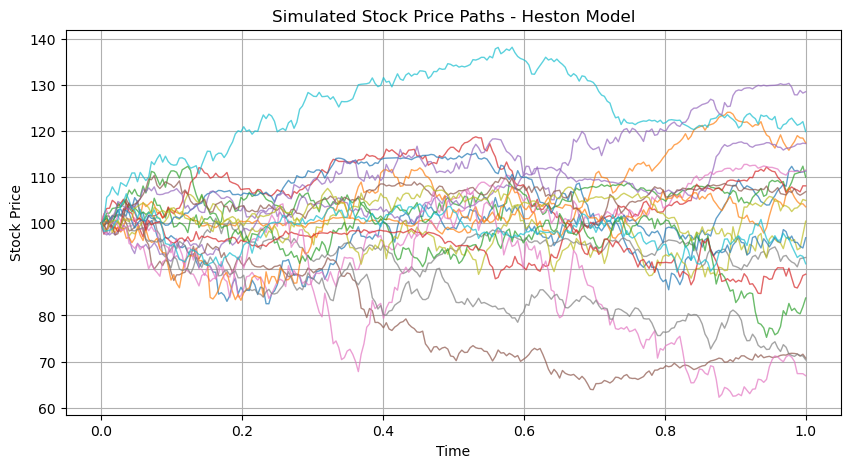

In [236]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
v0 = 0.04
r = 0.035
T = 1.0
n_steps = 252
n_paths = 100
kappa = 3.0
theta = 0.03
xi = 0.4
rho = -0.35
seed = 42

# Simulate
S_heston, v_heston = simulate_heston_paths(S0, v0, r, T, n_steps, n_paths, kappa, theta, xi, rho, seed)

# Plot
time_grid = np.linspace(0, T, n_steps + 1)
plt.figure(figsize=(10, 5))
for i in range(min(n_paths, 20)):  # Plot 20 paths max
    plt.plot(time_grid, S_heston[i], lw=1, alpha=0.7)
plt.title("Simulated Stock Price Paths - Heston Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


GARCH(1,1) Model Path Simulation

In [237]:
def simulate_garch_paths(S0, mu, r, T, n_steps, alpha0, alpha1, beta1, n_paths=10000, seed=None):
    """
    Simulates asset price paths under the GARCH(1,1) stochastic volatility model.

    Parameters:
        S0 (float): Initial stock price.
        mu (float): Drift of the stock price process (usually set equal to risk-free rate r).
        r (float): Risk-free interest rate.
        T (float): Time to maturity (in years).
        n_steps (int): Number of time steps.
        alpha0 (float): GARCH model constant term.
        alpha1 (float): Coefficient for lagged squared returns (ARCH term).
        beta1 (float): Coefficient for lagged variance (GARCH term).
        n_paths (int): Number of Monte Carlo paths to simulate.
        seed (int, optional): Random seed for reproducibility.

    Returns:
        tuple: (S, sigma)
            S: Simulated stock price paths (shape: [n_paths, n_steps+1])
            sigma: Simulated volatility paths (shape: [n_paths, n_steps+1])
    """
    import numpy as np

    if seed is not None:
        np.random.seed(seed)

    dt = T / n_steps
    eps = np.random.normal(0, 1, (n_paths, n_steps))
    sigma2 = np.zeros((n_paths, n_steps + 1))
    sigma2[:, 0] = alpha0 / (1 - alpha1 - beta1)

    S = np.zeros((n_paths, n_steps + 1))
    S[:, 0] = S0

    for t in range(n_steps):
        sigma2[:, t+1] = alpha0 + alpha1 * eps[:, t]**2 + beta1 * sigma2[:, t]
        sigma = np.sqrt(sigma2[:, t+1])
        S[:, t+1] = S[:, t] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eps[:, t])

    return S, np.sqrt(sigma2)


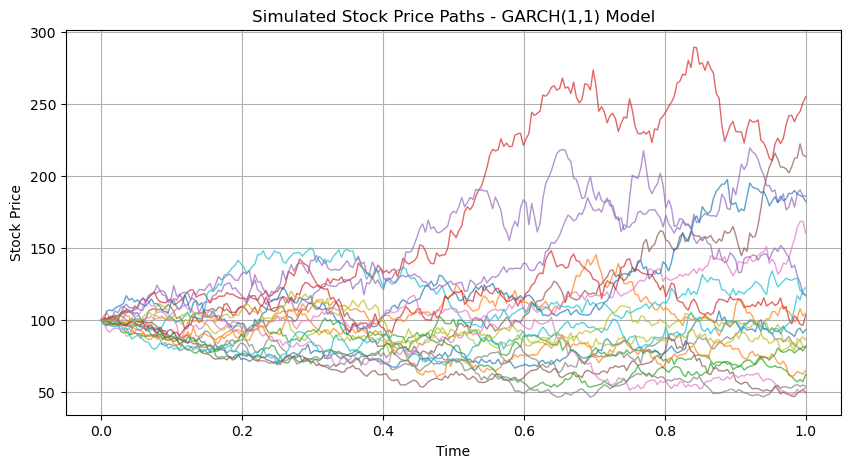

In [263]:
# Parameters
mu = r
alpha0 = 0.0005
alpha1 = 0.01
beta1 = 0.95

# Simulate
S_garch, sigma_garch = simulate_garch_paths(S0, mu, r, T, n_steps, alpha0, alpha1, beta1, n_paths, seed)

# Plot
plt.figure(figsize=(10, 5))
for i in range(min(n_paths, 20)):
    plt.plot(time_grid, S_garch[i], lw=1, alpha=0.7)
plt.title("Simulated Stock Price Paths - GARCH(1,1) Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


Monte Carlo Option Pricing from Simulated Paths under Heston and GARCH model

In [264]:
def price_option_from_paths(paths, K, r, T, option_type='call'):
    """
    Computes the Monte Carlo price of a European option from simulated paths.

    Parameters:
    - paths: ndarray of shape (n_paths, n_steps + 1), simulated stock paths
    - K: float, strike price
    - r: float, risk-free rate
    - T: float, time to maturity (in years)
    - option_type: 'call' or 'put'

    Returns:
    - price: float, discounted Monte Carlo price of the option
    """
    S_T = paths[:, -1]  # final asset prices

    if option_type == 'call':
        payoffs = np.maximum(S_T - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - S_T, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    discounted_payoffs = np.exp(-r * T) * payoffs
    return np.mean(discounted_payoffs)


In [265]:
# Pricing under Heston Model
call_price_heston = price_option_from_paths(S_heston, K, r, T, option_type='call')
put_price_heston  = price_option_from_paths(S_heston, K, r, T, option_type='put')

# Pricing under GARCH Model
call_price_garch = price_option_from_paths(S_garch, K, r, T, option_type='call')
put_price_garch  = price_option_from_paths(S_garch, K, r, T, option_type='put')


In [266]:
# Print option prices 

print(f"Heston Model - Call Price: {call_price_heston:.4f}")
print(f"Heston Model - Put Price : {put_price_heston:.4f}\n")

print(f"GARCH Model  - Call Price: {call_price_garch:.4f}")
print(f"GARCH Model  - Put Price : {put_price_garch:.4f}")


Heston Model - Call Price: 9.9338
Heston Model - Put Price : 4.9511

GARCH Model  - Call Price: 17.9225
GARCH Model  - Put Price : 14.4587


Comparison with Black_Scholes

In [267]:
#Black-Scholes price 
bs_call = Black_Scholes_Call(S0, K, sigma, T, r)
bs_put  = Black_Scholes_Put(S0, K, sigma, T, r)

# Store results
data = {
    "Model": ["Black-Scholes", "Heston", "GARCH(1,1)"],
    "Call Price": [bs_call, call_price_heston, call_price_garch],
    "Put Price": [bs_put, put_price_heston, put_price_garch]
}

df_sv_prices = pd.DataFrame(data)
display(df_sv_prices)


Model  Call Price  Put Price
0  Black-Scholes    9.667467   6.228009
1         Heston    9.933769   4.951106
2     GARCH(1,1)   17.922505  14.458748

#### Observations
Heston model prices are close to Black-Scholes, with slightly higher call price and lower put price. This makes sense since Heston captures volatility mean-reversion and stochasticity, which may lead to heavier tails or skewed distribution. GARCH(1,1) model shows significantly higher call and put prices. This is likely due to: high average volatility levels over the simulation horizon, and volatility clustering, leading to fatter tails in the simulated return distribution.



#### Visualize Volatility Paths for Heston and GARCH Models

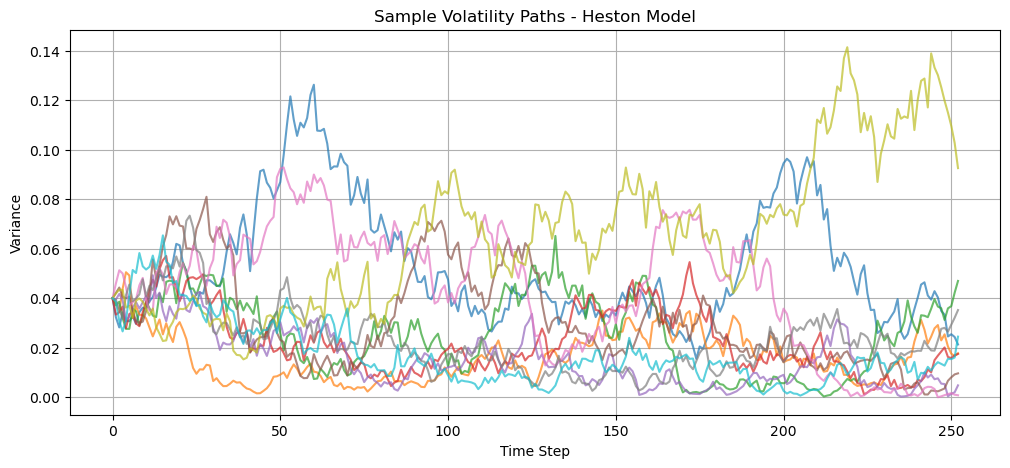

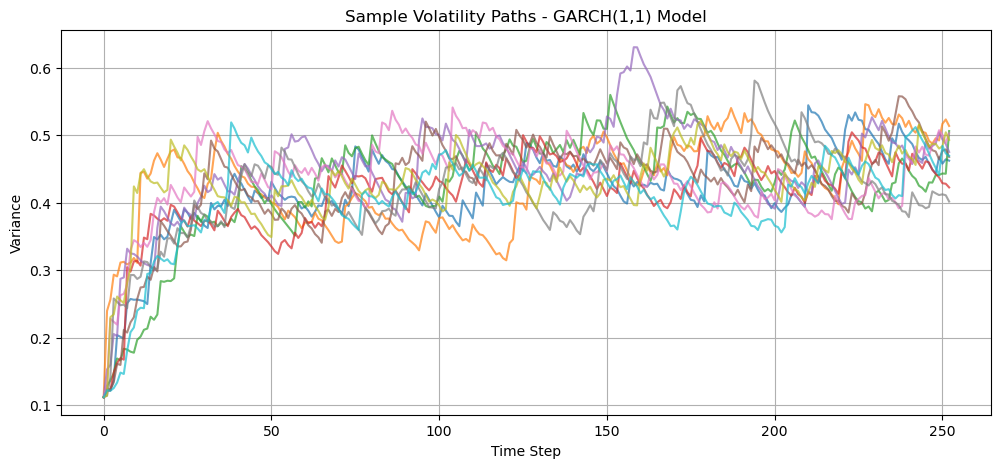

In [269]:
import matplotlib.pyplot as plt

# Plot Heston volatility paths
plt.figure(figsize=(12, 5))
for i in range(10):  # Plot 10 sample paths
    plt.plot(v_heston[i], alpha=0.7)
plt.title("Sample Volatility Paths - Heston Model")
plt.xlabel("Time Step")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

# Plot GARCH volatility paths
plt.figure(figsize=(12, 5))
for i in range(10):  # Plot 10 sample paths
    plt.plot(sigma_garch[i], alpha=0.7)
plt.title("Sample Volatility Paths - GARCH(1,1) Model")
plt.xlabel("Time Step")
plt.ylabel("Variance")
plt.grid(True)
plt.show()


Heston shows smoother, mean-reverting behavior. GARCH shows volatility clustering and persistent shocks.

#### Compute Implied Volatility from GARCH and Heston  Model Prices

In [272]:
from scipy.optimize import brentq

# Black-Scholes price (re-usable function)
def bs_call_price_iv(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def bs_put_price_iv(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Function to compute implied volatility
def implied_volatility_call(price_market, S, K, T, r):
    try:
        return brentq(lambda sigma: bs_call_price_iv(S, K, T, r, sigma) - price_market, 1e-5, 5.0)
    except ValueError:
        return np.nan

        
def implied_volatility_put(price_market, S, K, T, r):
    try:
        return brentq(lambda sigma: bs_put_price_iv(S, K, T, r, sigma) - price_market, 1e-5, 5.0)
    except ValueError:
        return np.nan





In [273]:
# Implied vol from Heston Call price
iv_heston_call = implied_volatility_put(call_price_heston, S0, K, T, r)
print(f"Implied Volatility from Heston Call Price: {iv_heston_call:.4f}")

# Implied vol from Heston put price
iv_heston_put = implied_volatility_put(put_price_heston, S0, K, T, r)
print(f"Implied Volatility from Heston Put Price: {iv_heston_put:.4f}")


# implied vol from GARCH call price
iv_garch_call = implied_volatility_call(call_price_garch, S0, K, T, r)
print(f"Implied Volatility from GARCH Call Price: {iv_garch_call:.4f}")

# implied vol from GARCH Put price
iv_garch_put = implied_volatility_put(put_price_garch, S0, K, T, r)
print(f"Implied Volatility from GARCH Put Price: {iv_garch_put:.4f}")



Implied Volatility from Heston Call Price: 0.2963
Implied Volatility from Heston Put Price: 0.1667
Implied Volatility from GARCH Call Price: 0.4148
Implied Volatility from GARCH Put Price: 0.4141
